In [179]:
# needed libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import colormaps, cm
from sklearn.preprocessing import MinMaxScaler
from plotter2 import custom_parallel_coordinates
from collections import OrderedDict


# 1. Data Preperation

## 1.1 Data Collection

In [180]:
# Define the subfolder names corresponding to different experiments.
subfoldernames = ["nfe50000_None_001_demand", "nfe50000_uwf_001_demand", "nfe50000_pwf_100_demand", "nfe50000_gini_01_demand"]

In [181]:
def get_principle(s):
    for principle in ["None", "uwf", "pwf", "gini"]:
        if principle in s:
            return principle
    raise ValueError("Invalid string, principle not recognized.")

In [182]:
results = {}
for subfolder in subfoldernames:
    opt_results = pd.read_csv(f"../outputs/{subfolder}/baseline_results_{subfolder}.csv", index_col=[0])
    principle = get_principle(subfolder)
    results[principle] = opt_results

In [183]:
# Displaying shape of each dataframe
for key, df in results.items():
    print(f"\nPrinciple: {key}")
    print(f"Shape: {df.shape}")


Principle: None
Shape: (207, 170)

Principle: uwf
Shape: (219, 171)

Principle: pwf
Shape: (238, 171)

Principle: gini
Shape: (338, 171)


## 1.2 Data Cleaning

In [184]:
policy_results = {}
objective_results = {}

for key, df in results.items():
    if key == "None":
        split_point = -6
    else:
        split_point = -7
    
    policies, objectives = df.iloc[:, :split_point], df.iloc[:, split_point:]
    policy_results[key] = policies
    objective_results[key] = objectives
    # Printing shape information
    print(f"Principle: {key}")
    print(f"Shape of policies: {policies.shape}")
    print(f"Shape of objectives: {objectives.shape}\n")

Principle: None
Shape of policies: (207, 164)
Shape of objectives: (207, 6)

Principle: uwf
Shape of policies: (219, 164)
Shape of objectives: (219, 7)

Principle: pwf
Shape of policies: (238, 164)
Shape of objectives: (238, 7)

Principle: gini
Shape of policies: (338, 164)
Shape of objectives: (338, 7)



In [185]:
# Concatenate all the dataframes in objective_results into one dataframe
df_experiments = pd.concat(objective_results, names=["Principle", "Index"])
df_experiments

egypt_agg_deficit_ratio  egypt_90p_deficit_ratio  \
Principle Index                                                     
None      0                     0.059863                 0.189728   
          1                     0.062170                 0.188981   
          2                     0.064460                 0.198946   
          3                     0.061862                 0.189675   
          4                     0.064488                 0.198994   
...                                  ...                      ...   
gini      333                   0.058888                 0.185044   
          334                   0.269800                 1.000000   
          335                   0.048625                 0.152609   
          336                   0.099155                 0.162350   
          337                   0.056078                 0.176157   

                 egypt_low_had_frequency  sudan_agg_deficit_ratio  \
Principle Index                                                     
None      0                     0.137500                 0.447351   
          1                     0.183333                 0.464333   
          2                     0.020833                 0.602078   
          3                     0.383333                 0.442585   
          4                     0.037500                 0.509928   
...                                  ...                      ...   
gini      333                   0.262500                 0.383202   
          334                   0.900000                 0.434169   
          335                   0.195833                 0.686921   
          336                   0.700000                 0.645428   
          337                   0.095833                 0.493905   

                 sudan_90p_deficit_ratio  ethiopia_agg_deficit_ratio  \
Principle Index                                                        
None      0                     0.887193                    0.775475   
          1                     0.740000                    0.749739   
          2                     0.897248                    0.721120   
          3                     0.754036                    0.746443   
          4                     0.732470                    0.742275   
...                                  ...                         ...   
gini      333                   0.875075                    0.849522   
          334                   0.892256                    0.820905   
          335                   0.903032                    0.757236   
          336                   0.905318                    0.768033   
          337                   0.886140                    0.813899   

                 principle_result  
Principle Index                    
None      0                   NaN  
          1                   NaN  
          2                   NaN  
          3                   NaN  
          4                   NaN  
...                           ...  
gini      333            0.605042  
          334            0.802344  
          335            0.600559  
          336            0.700105  
          337            0.562370  

[1002 rows x 7 columns]

## 1.3 Exploratory Data Analysis

In [186]:
# Determine the number of principles and objectives
num_principles = len(objective_results.keys())
first_principle = list(objective_results.keys())[0]
num_objectives = objective_results[first_principle].shape[1]

In [187]:
# # Create subplots
# fig, axes = plt.subplots(num_principles, num_objectives, figsize=(15, 5 * num_principles), sharex=False, sharey=False)

# for p_idx, (principle, objectives_df) in enumerate(objective_results.items()):
#     for o_idx in range(num_objectives):
#         ax = axes[p_idx][o_idx] if num_principles > 1 else axes[o_idx]
        
#         # Check if this principle has data for the current objective
#         if o_idx < objectives_df.shape[1]:
#             objective_column = objectives_df.columns[o_idx]
#             sns.histplot(objectives_df[df.columns][objective_column], ax=ax, kde=True, bins=30)
#             if p_idx == 0:
#                 ax.set_title(objective_column)
#         else:
#             ax.axis("off")  # Turn off axes for empty plots
        
#         if o_idx == 0:
#             ax.set_ylabel(principle)

# plt.tight_layout()
# plt.show()


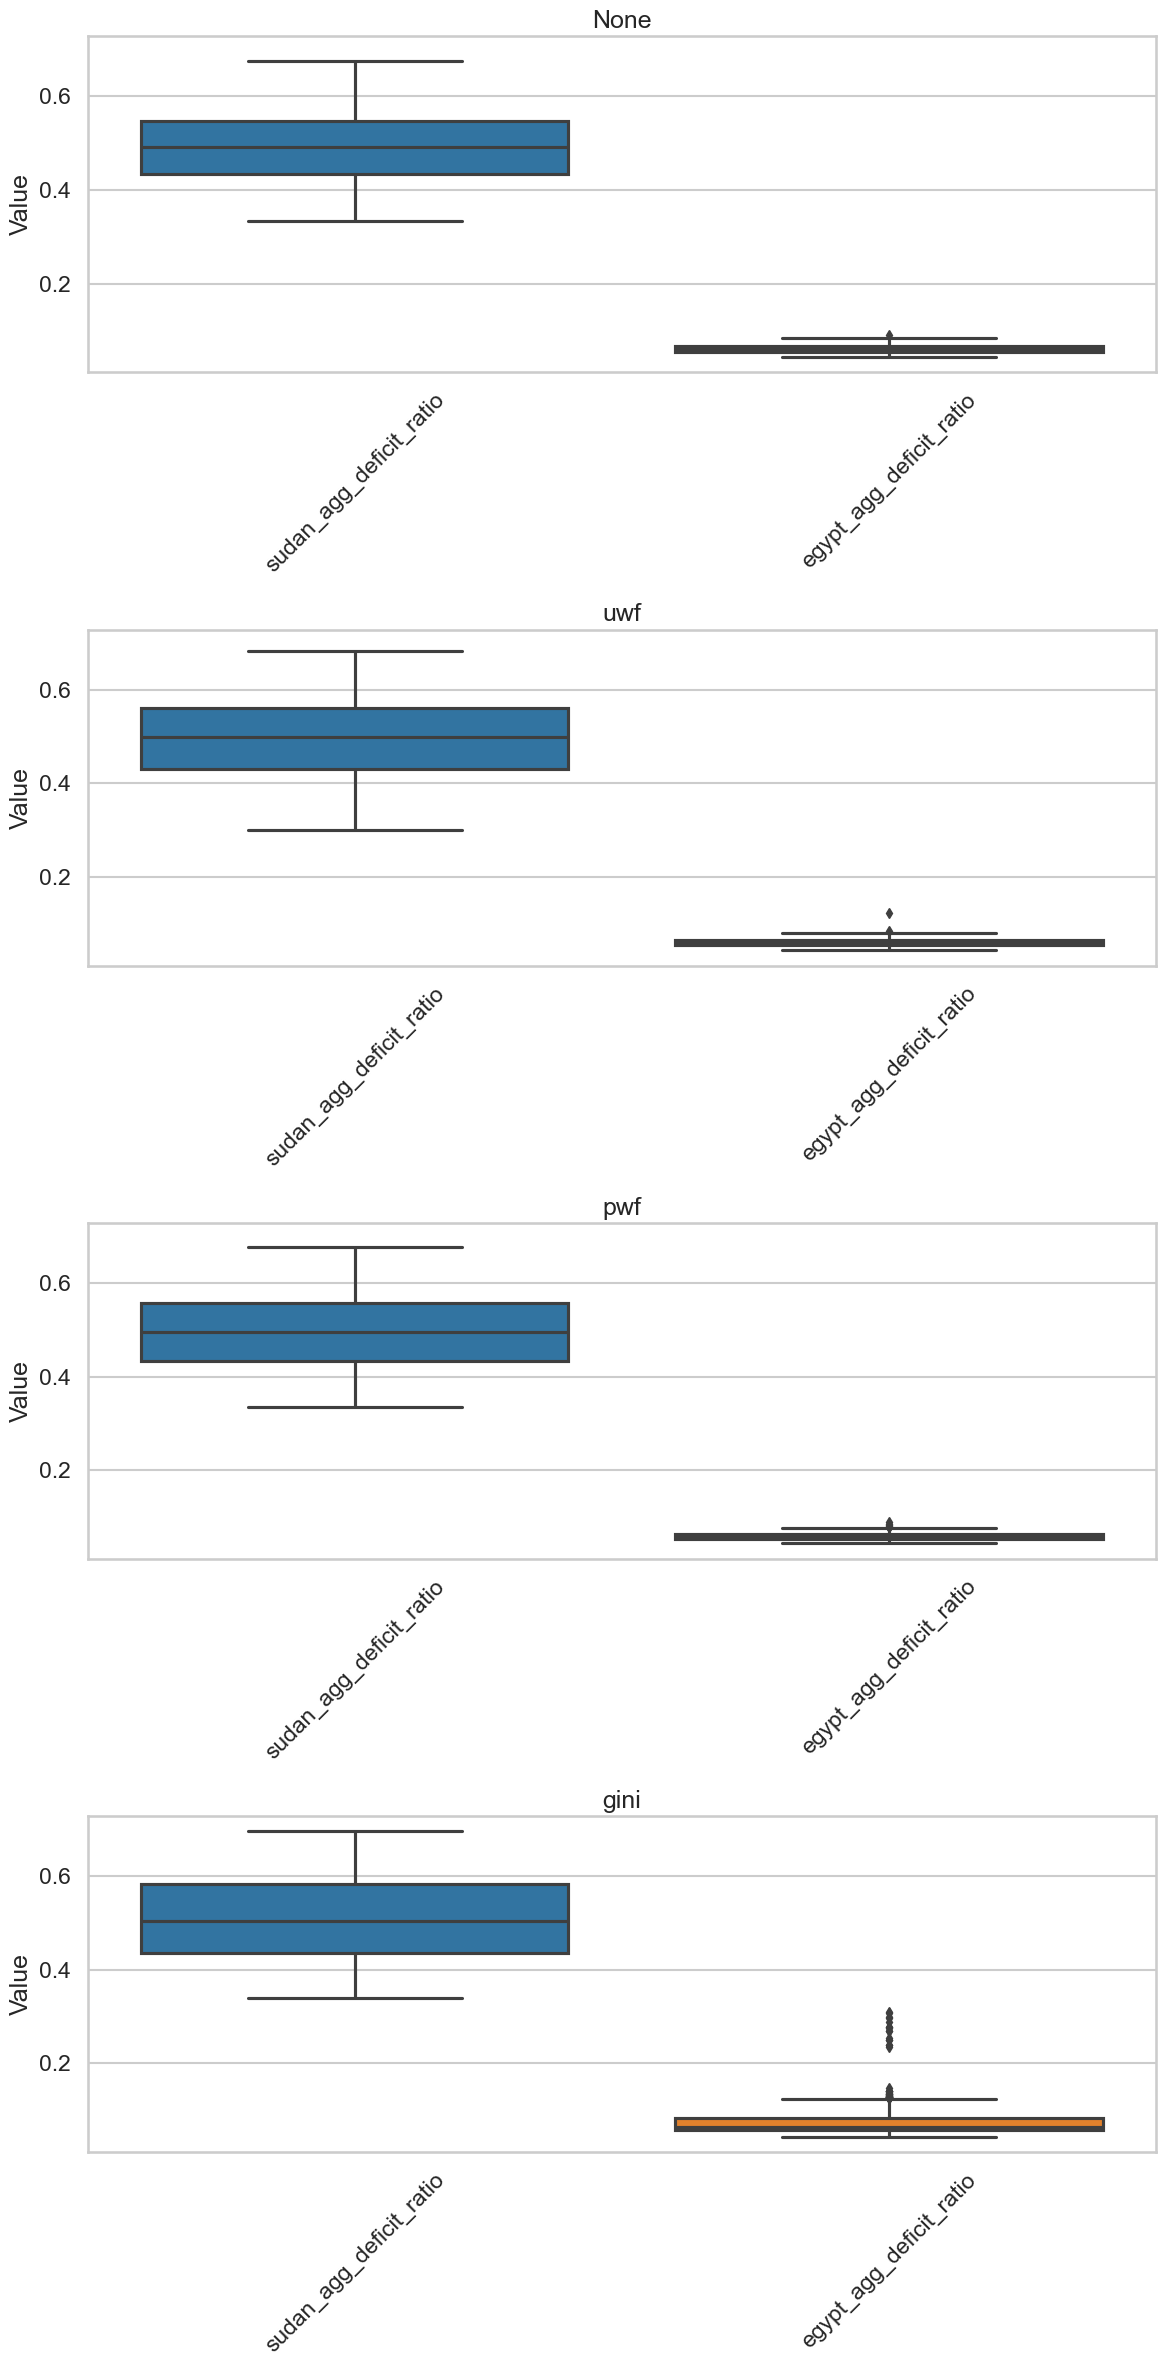

In [188]:
# Objectives of interest
objectives_of_interest = ['sudan_agg_deficit_ratio', 'egypt_agg_deficit_ratio']

# Create subplots for each principle
fig, axes = plt.subplots(num_principles, 1, figsize=(12, 6 * num_principles), sharex=False, sharey=True)

# Seaborn style and context for better aesthetics and readability
sns.set_style("whitegrid")
sns.set_context("talk")  # 'talk' context is suitable for presentations, 'paper' or 'notebook' can be used for other scenarios

for p_idx, (principle, objectives_df) in enumerate(objective_results.items()):
    ax = axes[p_idx] if num_principles > 1 else axes
    
    if set(objectives_of_interest).issubset(objectives_df.columns):
        sns.boxplot(data=objectives_df[objectives_of_interest], ax=ax)
        ax.set_title(principle)
        ax.set_ylabel("Value")  # since the units/quantity might be common, else adjust as per your data
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotating x labels for better visibility

plt.tight_layout()
plt.show()

In [189]:
# Objectives of interest
objectives_of_interest = ['egypt_90p_deficit_ratio','sudan_90p_deficit_ratio']

# Create subplots for each principle
fig, axes = plt.subplots(num_principles, 1, figsize=(12, 6 * num_principles), sharex=False, sharey=True)

# Seaborn style and context for better aesthetics and readability
sns.set_style("whitegrid")
sns.set_context("talk")  # 'talk' context is suitable for presentations, 'paper' or 'notebook' can be used for other scenarios

for p_idx, (principle, objectives_df) in enumerate(objective_results.items()):
    ax = axes[p_idx] if num_principles > 1 else axes
    
    if set(objectives_of_interest).issubset(objectives_df.columns):
        sns.boxplot(data=objectives_df[objectives_of_interest], ax=ax)
        ax.set_title(principle)
        ax.set_ylabel("Value")  # since the units/quantity might be common, else adjust as per your data
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotating x labels for better visibility

plt.tight_layout()
plt.show()

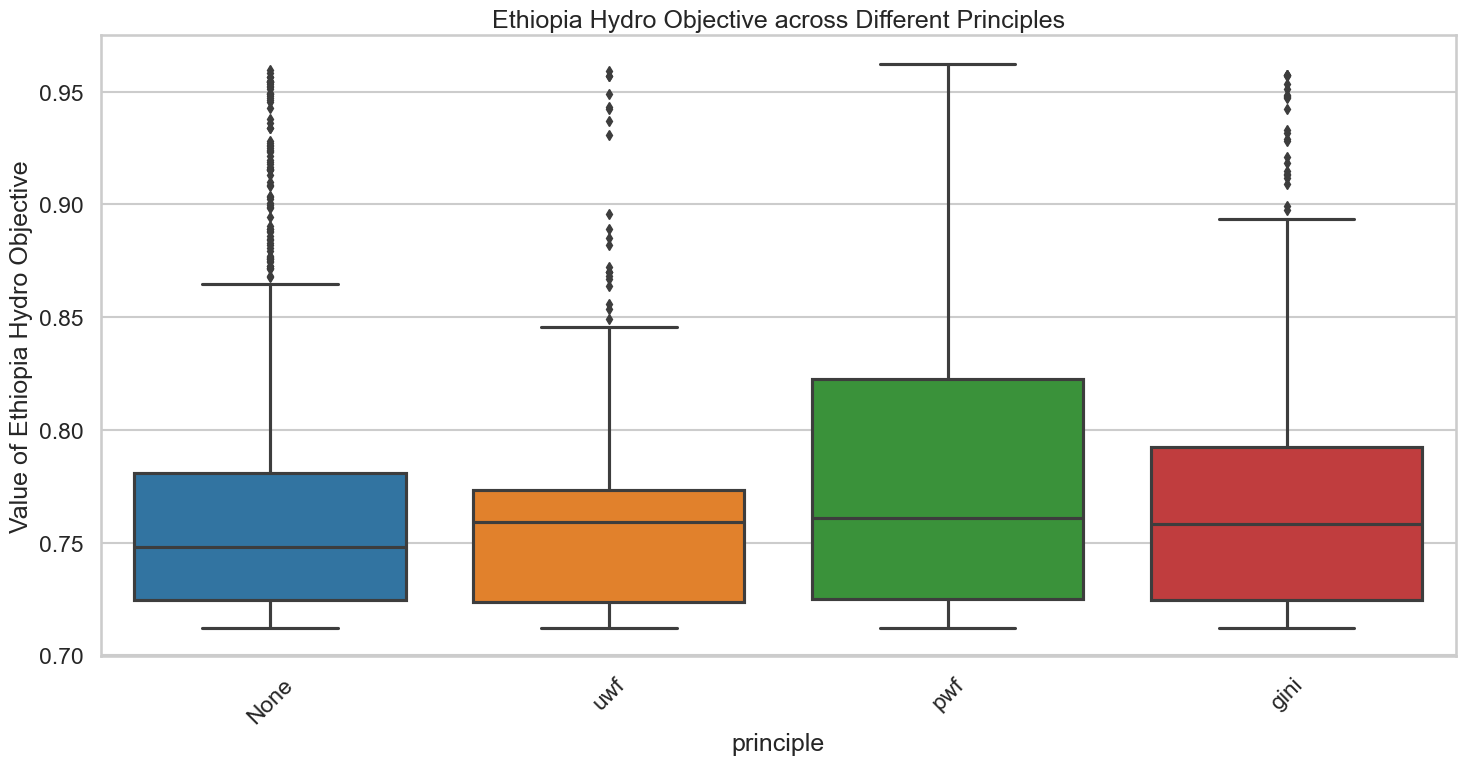

In [ ]:
# Extract the 'ethiopia_hydro' data for every principle and stack them together with the principle as a categorizing column
data_list = []
for principle, objectives_df in objective_results.items():
    if 'ethiopia_agg_deficit_ratio' in objectives_df.columns:
        temp_df = objectives_df[['ethiopia_agg_deficit_ratio']].copy()
        temp_df['principle'] = principle
        data_list.append(temp_df)

combined_data = pd.concat(data_list)

# Plot
plt.figure(figsize=(15, 8))

# Seaborn style and context for better aesthetics and readability
sns.set_style("whitegrid")
sns.set_context("talk")  # 'talk' context is suitable for presentations

sns.boxplot(data=combined_data, x='principle', y='ethiopia_agg_deficit_ratio')

plt.title("Ethiopia Hydro Objective across Different Principles")
plt.ylabel("Value of Ethiopia Hydro Objective")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

##

# 2. Creating prcinciple results

## 2.1 Normalization

### 2.1.1 Normalization with MinMaxScalar

## 2.2 Formulating the SWFs

### 2.2.1 The Utilitarian Welfare Function

In [ ]:

def calculate_utilitarian_welfare(refSet, columns):
    """
    Calculates the utilitarian welfare for each policy in the DataFrame.

    Args:
        refSet (pandas.DataFrame): Input DataFrame containing policy data.
        columns (list): List of column names to consider for calculating the utilitarian welfare.

    Returns:
        pandas.DataFrame: A new DataFrame with the utilitarian welfare scores for each policy.
    """
    # Create a copy of the input DataFrame to avoid modifying the original data
    df_uwf = refSet.copy()
    
    # Calculate the utilitarian welfare and add it as a new column to the new DataFrame
    uwf = df_uwf[columns].apply(lambda row: 1 - row, axis=1).sum(axis=1)
    df_uwf['utilitarian_welfare'] = uwf
    
    return df_uwf

### 2.2.2 The Prioritarian Welfare Function

In [ ]:
def compute_pairwise_differences(objectives):
    """Computes the signed pairwise differences prioritizing lower objectives."""
    pairwise_differences = np.zeros((len(objectives), len(objectives)))
    for i in range(len(objectives)):
        for j in range(len(objectives)):
            pairwise_differences[i, j] = objectives[j] - objectives[i]  # Inversion for prioritization
    return pairwise_differences

def compute_gamma(objectives):
    """Computes gamma values for each objective."""
    pairwise_differences = compute_pairwise_differences(objectives)
    gamma_raw = np.sum(pairwise_differences, axis=1) - np.diagonal(pairwise_differences)
    gamma_raw /= (len(objectives) - 1)
    gamma_per_objective = (gamma_raw - np.min(gamma_raw)) / (np.max(gamma_raw) - np.min(gamma_raw))
    gamma_per_objective /= np.sum(gamma_per_objective)
    return gamma_per_objective

def compute_pwf_pairwise(objectives):
    """Computes PWF values for each objective based on gamma and returns the total sum."""
    gamma_per_objective = compute_gamma(objectives)
    pwf_results = []
    for idx, obj in enumerate(objectives):
        if gamma_per_objective[idx] != 1:
            if obj >= 0:
                pwf_results.append((obj ** (1 - gamma_per_objective[idx])) / (1 - gamma_per_objective[idx]))
            else:
                pwf_results.append((abs(obj) ** (1 - gamma_per_objective[idx])) / (1 - gamma_per_objective[idx]))
        else:
            pwf_results.append(np.log(abs(obj)))
    
    total_pwf = sum(pwf_results)
    return pwf_results, total_pwf

def compute_pwf(objectives, gamma):
    """Computes PWF values for each objective based on preset gamma and returns the total sum."""
    pwf_results = []
    for obj in objectives:
        if (1 - obj) == 0:
            pwf_results.append(0)
        elif obj > 0:
            pwf_results.append(( (1 - obj) ** (1 - gamma)) / (1 - gamma))
        else:
            pwf_results.append(( (1 + obj) ** (1 - gamma)) / (1 - gamma))
    
    total_pwf = sum(pwf_results)
    return pwf_results, total_pwf


In [ ]:
def calculate_prioritarian_welfare_pairwise(refset, columns):
    """
    Calculate Prioritarian Welfare for a solution set in a DataFrame by computing gamma and PWF for each set of objectives.

    Args:
        refset (pandas.DataFrame): Input DataFrame containing solution sets.
        columns (list): List of column names representing objectives.

    Returns:
        pandas.DataFrame: A new DataFrame with computed gamma and PWF values for each solution set.
    """
    
    # Create a new DataFrame as a copy of the input 'refset'
    df_pwf = refset.copy()
    
    # Calculate gamma values for each solution set and store them in a new 'gamma_values' column
    df_pwf['gamma_values'] = df_pwf[columns].apply(compute_gamma, axis=1)
    
    # Calculate PWF values for each solution set and store them in 'pwf_values' and 'total_pwf' columns
    df_pwf[['pwf_values', 'total_pwf']] = df_pwf[columns].apply(compute_pwf_pairwise, axis=1).apply(pd.Series)
    
    return df_pwf

In [ ]:
def calculate_prioritarian_welfare(refset, columns, gamma):
    """
    Calculate Prioritarian Welfare for a solution set in a DataFrame by computing gamma and PWF for each set of objectives.

    Args:
        refset (pandas.DataFrame): Input DataFrame containing solution sets.
        columns (list): List of column names representing objectives.

    Returns:
        pandas.DataFrame: A new DataFrame with computed gamma and PWF values for each solution set.
    """
    
    # Create a new DataFrame as a copy of the input 'refset'
    df_pwf = refset.copy()
    
    # Calculate PWF values for each solution set and store them in 'pwf_values' and 'total_pwf' columns
    df_pwf[['pwf_values', 'total_pwf']] = df_pwf[columns].apply(lambda row: compute_pwf(row, gamma), axis=1).apply(pd.Series)
    
    return df_pwf

### 2.2.3 The Egalitarian Welfare Function

In [ ]:
def calculate_gini_index(refSet, columns):
    """
    Calculates the Gini index of each policy in a DataFrame and adds it as a new column.

    Args:
        refSet (pandas.DataFrame): Input DataFrame containing policy data.
        columns (list): List of column names to consider for calculating the Gini index.

    Returns:
        pandas.DataFrame: DataFrame with the added Gini index column.
    """

    df_gini = refSet.copy()

    mean_x = df_gini[columns].mean(axis=1)
    denominator = 2 * mean_x * len(columns)**2

    numerator = df_gini[columns].sub(df_gini[columns].mean(axis=1), axis='rows').abs().sum(axis=1)


    gini_index = numerator / denominator
    df_gini['gini_index'] = gini_index

    return df_gini

## 2.3 Creating the A Posteriori experiment results for all principles 

In [ ]:
df_experiments

egypt_agg_deficit_ratio  egypt_90p_deficit_ratio  \
Principle Index                                                     
None      0                     0.063613                 0.188565   
          1                     0.056751                 0.182391   
          2                     0.072306                 0.218951   
          3                     0.064737                 0.188565   
          4                     0.069314                 0.213487   
...                                  ...                      ...   
gini      333                   0.058888                 0.185044   
          334                   0.269800                 1.000000   
          335                   0.048625                 0.152609   
          336                   0.099155                 0.162350   
          337                   0.056078                 0.176157   

                 egypt_low_had_frequency  sudan_agg_deficit_ratio  \
Principle Index                                                     
None      0                     0.550000                 0.486225   
          1                     0.450000                 0.437165   
          2                     0.000000                 0.379632   
          3                     0.391667                 0.494366   
          4                     0.320833                 0.401461   
...                                  ...                      ...   
gini      333                   0.262500                 0.383202   
          334                   0.900000                 0.434169   
          335                   0.195833                 0.686921   
          336                   0.700000                 0.645428   
          337                   0.095833                 0.493905   

                 sudan_90p_deficit_ratio  ethiopia_agg_deficit_ratio  \
Principle Index                                                        
None      0                     0.903032                    0.712396   
          1                     0.732470                    0.763220   
          2                     0.887193                    0.783041   
          3                     0.905561                    0.712678   
          4                     0.723584                    0.731933   
...                                  ...                         ...   
gini      333                   0.875075                    0.849522   
          334                   0.892256                    0.820905   
          335                   0.903032                    0.757236   
          336                   0.905318                    0.768033   
          337                   0.886140                    0.813899   

                 principle_result  
Principle Index                    
None      0                   NaN  
          1                   NaN  
          2                   NaN  
          3                   NaN  
          4                   NaN  
...                           ...  
gini      333            0.605042  
          334            0.802344  
          335            0.600559  
          336            0.700105  
          337            0.562370  

[1679 rows x 7 columns]

In [ ]:
# Define columns to consider for calculating utilitarian welfare
objectives_narrow = ['egypt_agg_deficit_ratio', 'egypt_90p_deficit_ratio', 'egypt_low_had_frequency', 'sudan_agg_deficit_ratio', 'sudan_90p_deficit_ratio', 'ethiopia_agg_deficit_ratio']
directions_narrow = {'egypt_agg_deficit_ratio': 'min', 'egypt_90p_deficit_ratio': 'min', 'egypt_low_had_frequency': 'min', 'sudan_agg_deficit_ratio': 'min', 'sudan_90p_deficit_ratio': 'min', 'ethiopia_agg_deficit_ratio': 'min',}

In [ ]:
prio_dfs = {}

# Assuming 'grouped' is your grouped DataFrame and 'objectives_narrow' contains the column names you want to normalize
for principle, subset in df_experiments.groupby(level='Principle', sort=False):
    # Extract the subset of columns you want to use for swf calculations
    subset_to_analyze = subset.copy()[objectives_narrow]
    # Use the principle as the key in the dictionary
    prio_dfs[principle] = subset_to_analyze.droplevel(level='Principle')

In [ ]:
# Access the normalized subsets using principle names (e.g., 'None', 'uwf', 'pwf', 'gini')
prio_none = prio_dfs['None']
prio_uwf = prio_dfs['uwf']
prio_pwf = prio_dfs['pwf']
prio_gini = prio_dfs['gini']

In [ ]:
# Define a dictionary to store utilitarian welfare DataFrames for each subset
utilitarian_welfare_results = {}

# Calculate utilitarian welfare for each normalized subset
swf_dfs = {}
for principle, subset in prio_dfs.items():
    swf_dfs[principle] = calculate_utilitarian_welfare(subset, objectives_narrow)
    swf_dfs[principle] = calculate_prioritarian_welfare(swf_dfs[principle], objectives_narrow, gamma=3)
    swf_dfs[principle] = calculate_gini_index(swf_dfs[principle], objectives_narrow)

In [ ]:
# Concatenate all the dataframes in swf_dfs into one dataframe with a multi-level index
df_swfs = pd.concat(swf_dfs, names=["Principle", "Index"])

df_swfs

egypt_agg_deficit_ratio  egypt_90p_deficit_ratio  \
Principle Index                                                     
None      0                     0.063613                 0.188565   
          1                     0.056751                 0.182391   
          2                     0.072306                 0.218951   
          3                     0.064737                 0.188565   
          4                     0.069314                 0.213487   
...                                  ...                      ...   
gini      333                   0.058888                 0.185044   
          334                   0.269800                 1.000000   
          335                   0.048625                 0.152609   
          336                   0.099155                 0.162350   
          337                   0.056078                 0.176157   

                 egypt_low_had_frequency  sudan_agg_deficit_ratio  \
Principle Index                                                     
None      0                     0.550000                 0.486225   
          1                     0.450000                 0.437165   
          2                     0.000000                 0.379632   
          3                     0.391667                 0.494366   
          4                     0.320833                 0.401461   
...                                  ...                      ...   
gini      333                   0.262500                 0.383202   
          334                   0.900000                 0.434169   
          335                   0.195833                 0.686921   
          336                   0.700000                 0.645428   
          337                   0.095833                 0.493905   

                 sudan_90p_deficit_ratio  ethiopia_agg_deficit_ratio  \
Principle Index                                                        
None      0                     0.903032                    0.712396   
          1                     0.732470                    0.763220   
          2                     0.887193                    0.783041   
          3                     0.905561                    0.712678   
          4                     0.723584                    0.731933   
...                                  ...                         ...   
gini      333                   0.875075                    0.849522   
          334                   0.892256                    0.820905   
          335                   0.903032                    0.757236   
          336                   0.905318                    0.768033   
          337                   0.886140                    0.813899   

                 utilitarian_welfare  \
Principle Index                        
None      0                 3.096169   
          1                 3.378004   
          2                 3.658878   
          3                 3.242426   
          4                 3.539387   
...                              ...   
gini      333               3.385769   
          334               1.682869   
          335               3.255744   
          336               2.719717   
          337               3.477988   

                                                        pwf_values  \
Principle Index                                                      
None      0      [-0.5702421182697969, -0.7593854130254312, -2....   
          1      [-0.5619749497545813, -0.7479601826744777, -1....   
          2      [-0.5809788857084635, -0.8196211490200359, -0....   
          3      [-0.5716140576480414, -0.7593854130254312, -1....   
          4      [-0.5772499768638394, -0.8082730288547684, -1....   
...                                                            ...   
gini      333    [-0.5645300101026696, -0.752838595323135, -0.9...   
          334    [-0.9377495707200256, 0, -50.00000000000002, -...   
          335    [-0.5524168726157689, -0.696308779094049, -0.7

Check if this went well by comparing df_none with the first subset

In [ ]:
df_swfs_exps = pd.merge(df_experiments, df_swfs[['utilitarian_welfare', 'total_pwf', 'gini_index']], on=['Principle', 'Index'])
df_swfs_exps

egypt_agg_deficit_ratio  egypt_90p_deficit_ratio  \
Principle Index                                                     
None      0                     0.063613                 0.188565   
          1                     0.056751                 0.182391   
          2                     0.072306                 0.218951   
          3                     0.064737                 0.188565   
          4                     0.069314                 0.213487   
...                                  ...                      ...   
gini      333                   0.058888                 0.185044   
          334                   0.269800                 1.000000   
          335                   0.048625                 0.152609   
          336                   0.099155                 0.162350   
          337                   0.056078                 0.176157   

                 egypt_low_had_frequency  sudan_agg_deficit_ratio  \
Principle Index                                                     
None      0                     0.550000                 0.486225   
          1                     0.450000                 0.437165   
          2                     0.000000                 0.379632   
          3                     0.391667                 0.494366   
          4                     0.320833                 0.401461   
...                                  ...                      ...   
gini      333                   0.262500                 0.383202   
          334                   0.900000                 0.434169   
          335                   0.195833                 0.686921   
          336                   0.700000                 0.645428   
          337                   0.095833                 0.493905   

                 sudan_90p_deficit_ratio  ethiopia_agg_deficit_ratio  \
Principle Index                                                        
None      0                     0.903032                    0.712396   
          1                     0.732470                    0.763220   
          2                     0.887193                    0.783041   
          3                     0.905561                    0.712678   
          4                     0.723584                    0.731933   
...                                  ...                         ...   
gini      333                   0.875075                    0.849522   
          334                   0.892256                    0.820905   
          335                   0.903032                    0.757236   
          336                   0.905318                    0.768033   
          337                   0.886140                    0.813899   

                 principle_result  utilitarian_welfare   total_pwf  gini_index  
Principle Index                                                                 
None      0                   NaN             3.096169  -64.913813    0.041082  
          1                   NaN             3.378004  -20.445354    0.040355  
          2                   NaN             3.658878  -53.113124    0.063350  
          3                   NaN             3.242426  -66.756046    0.044352  
          4                   NaN             3.539387  -17.367179    0.043032  
...                           ...                  ...         ...         ...  
gini      333            0.605042             3.385769  -57.670601    0.054394  
          334            0.802344             1.682869 -111.158951    0.028378  
          335            0.600559             3.255744  -68.783051    0.059218  
          336            0.700105             2.719717  -75.928109    0.042269  
          337            0.562370             3.477988  -56.866261    0.061653  

[1679 rows x 10 columns]

## 2.4 Verification

Since we want to be consequent in our evaluation. The following cells are to verify if the values from the a priori optmization find the same values as the posteriori optimization. We can check this by comparing the experiment principle_result objective values with the corresponding posteriori column values for the principle of that experiment. In other words, If optimised for uwf compare with posteriori uwf column.

In [ ]:
# Flag to indicate whether we have reached the second principle index value
second_principle_flag = False

# List to store the indices where mismatches are found
mismatch_indices = []

# Iterate over unique values in the 'Principle' level
for principle in df_swfs_exps.index.get_level_values('Principle').unique():
    # Get the subset of the DataFrame for the current principle
    subset = df_swfs_exps.loc[principle]
    # Counter for columns to consider from the back
    column_counter = 4  # Start from the third column from the back
    # Iterate over the rows in the subset
    for idx in range(len(subset.index)):  # Iterate till the third column from the back
        # Check if we have reached the second principle index value
        if not second_principle_flag:
            continue
        # Get the values for principle_result and the corresponding column
        principle_result_value = subset.iloc[idx]['principle_result']
        corresponding_column_value = subset.iloc[idx, -column_counter]  # Column from the back
        # Compare the values
        if principle_result_value != corresponding_column_value:
            mismatch_indices.append((principle, subset.index[idx]))  # Store the mismatch indices
        # Increment the column counter for the next iteration
    column_counter -= 1  # Move to the next column from the back
    second_principle_flag = True

# Print mismatches found
if len(mismatch_indices) > 0:
    print("Mismatches found:")
    for principle, idx in mismatch_indices:
        print(f"Principle: {principle}, Index: {idx}")
else:
    print("No mismatches found.")

No mismatches found.


# 3. Visualization of results

## 3.1 Needed functions 

In [ ]:
def get_best_solutions(dataframe, objective_directions):
    """
    Get the index of the best performing solution for each objective based on the specified objective directions.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing the objective values.
        objective_directions (dict): A dictionary mapping each objective column name to its direction ('min' or 'max').

    Returns:
        dict: A dictionary mapping each objective column name to the index of the best performing solution.

    """
    if not set(objective_directions.values()).issubset({'min', 'max'}):
        raise ValueError("Invalid objective direction. Must be 'min' or 'max'.")

    best_solutions = {}

    for column, direction in objective_directions.items():
        if direction == 'max':
            best_index = dataframe[column].idxmax()
        elif direction == 'min':
            best_index = dataframe[column].idxmin()

        best_solutions[column] = best_index

    return best_solutions

In [ ]:
def create_global_variables(best_obj_indices, policies):
    """
    Create individual variables dynamically using a loop.

    Parameters:
        best_obj_indices (dict): A dictionary containing the objective names as keys and their
                                 corresponding best value indices as values.
        policies (DataFrame): The DataFrame containing the data.

    Returns:
        list: A list of the names of the created global variables.
    """
    created_global_variable_names = []
    created_global_variables = []
    merged_keys_dict = {}

    for obj_name, obj_indices in best_obj_indices.items():
        if not isinstance(obj_indices, (list, tuple)):
            obj_indices = [obj_indices]  # Convert to list if it's a single index
        value = tuple(obj_indices)
        if value in merged_keys_dict:
            merged_keys_dict[value].append(obj_name)
        else:
            merged_keys_dict[value] = [obj_name]

    for value, obj_names in merged_keys_dict.items():
        # Check if the indices are unique for the merged keys
        if len(obj_names) == 1:
            obj_name = obj_names[0]
            global_variable_name = f"best_{obj_name}"
            globals()[global_variable_name] = best_obj_indices[obj_name]
            created_global_variable_names.append(global_variable_name)
            created_global_variables.append(globals()[global_variable_name])
        else:
            # If the indices are not unique, merge the key strings
            merged_key_string = "_".join(obj_names)
            global_variable_name = f"best_{merged_key_string}"
            globals()[global_variable_name] = value
            created_global_variable_names.append(global_variable_name)
            created_global_variables.append(globals()[global_variable_name])

    return created_global_variable_names, created_global_variables

## 3.2 A Posteriori results

In [ ]:
df_swfs_None = df_swfs_exps.xs(key='None', level='Principle').drop(columns='principle_result')
df_swfs_None

egypt_agg_deficit_ratio  egypt_90p_deficit_ratio  \
Index                                                     
0                     0.063613                 0.188565   
1                     0.056751                 0.182391   
2                     0.072306                 0.218951   
3                     0.064737                 0.188565   
4                     0.069314                 0.213487   
...                        ...                      ...   
879                   0.056871                 0.165924   
880                   0.048425                 0.146443   
881                   0.057983                 0.180804   
882                   0.058320                 0.181834   
883                   0.062760                 0.194361   

       egypt_low_had_frequency  sudan_agg_deficit_ratio  \
Index                                                     
0                     0.550000                 0.486225   
1                     0.450000                 0.437165   
2                     0.000000                 0.379632   
3                     0.391667                 0.494366   
4                     0.320833                 0.401461   
...                        ...                      ...   
879                   0.550000                 0.546680   
880                   0.183333                 0.593049   
881                   0.129167                 0.538041   
882                   0.012500                 0.532632   
883                   0.158333                 0.558204   

       sudan_90p_deficit_ratio  ethiopia_agg_deficit_ratio  \
Index                                                        
0                     0.903032                    0.712396   
1                     0.732470                    0.763220   
2                     0.887193                    0.783041   
3                     0.905561                    0.712678   
4                     0.723584                    0.731933   
...                        ...                         ...   
879                   0.867324                    0.735183   
880                   0.905675                    0.786428   
881                   0.756291                    0.758836   
882                   0.905318                    0.860229   
883                   0.857665                    0.734459   

       utilitarian_welfare  total_pwf  gini_index  
Index                                              
0                 3.096169 -64.913813    0.041082  
1                 3.378004 -20.445354    0.040355  
2                 3.658878 -53.113124    0.063350  
3                 3.242426 -66.756046    0.044352  
4                 3.539387 -17.367179    0.043032  
...                    ...        ...         ...  
879               3.078018 -41.717171    0.042848  
880               3.336647 -72.166173    0.059666  
881               3.578879 -21.326053    0.058004  
882               3.449167 -85.481112    0.066825  
883               3.434218 -36.378164    0.056346  

[884 rows x 9 columns]

In [ ]:
best_solutions_None_narrow = get_best_solutions(df_swfs_None[objectives_narrow], directions_narrow)
print(best_solutions_None_narrow)

{'egypt_agg_deficit_ratio': 413, 'egypt_90p_deficit_ratio': 151, 'egypt_low_had_frequency': 2, 'sudan_agg_deficit_ratio': 566, 'sudan_90p_deficit_ratio': 6, 'ethiopia_agg_deficit_ratio': 482}


In [ ]:
created_vars_names_None_narrow, created_vars_None_narrow = create_global_variables(best_solutions_None_narrow, df_swfs_None[objectives_narrow])

In [ ]:
print(created_vars_names_None_narrow)

['best_egypt_agg_deficit_ratio', 'best_egypt_90p_deficit_ratio', 'best_egypt_low_had_frequency', 'best_sudan_agg_deficit_ratio', 'best_sudan_90p_deficit_ratio', 'best_ethiopia_agg_deficit_ratio']


In [ ]:
### Now color by a categorical variable that isnt one of the axes
df_swfs_None["Category_narrow"] = 'other'
for i, solution_index in enumerate(created_vars_None_narrow):
    df_swfs_None.loc[solution_index, "Category_narrow"] = created_vars_names_None_narrow[i]
df_swfs_None

egypt_agg_deficit_ratio  egypt_90p_deficit_ratio  \
Index                                                     
0                     0.063613                 0.188565   
1                     0.056751                 0.182391   
2                     0.072306                 0.218951   
3                     0.064737                 0.188565   
4                     0.069314                 0.213487   
...                        ...                      ...   
879                   0.056871                 0.165924   
880                   0.048425                 0.146443   
881                   0.057983                 0.180804   
882                   0.058320                 0.181834   
883                   0.062760                 0.194361   

       egypt_low_had_frequency  sudan_agg_deficit_ratio  \
Index                                                     
0                     0.550000                 0.486225   
1                     0.450000                 0.437165   
2                     0.000000                 0.379632   
3                     0.391667                 0.494366   
4                     0.320833                 0.401461   
...                        ...                      ...   
879                   0.550000                 0.546680   
880                   0.183333                 0.593049   
881                   0.129167                 0.538041   
882                   0.012500                 0.532632   
883                   0.158333                 0.558204   

       sudan_90p_deficit_ratio  ethiopia_agg_deficit_ratio  \
Index                                                        
0                     0.903032                    0.712396   
1                     0.732470                    0.763220   
2                     0.887193                    0.783041   
3                     0.905561                    0.712678   
4                     0.723584                    0.731933   
...                        ...                         ...   
879                   0.867324                    0.735183   
880                   0.905675                    0.786428   
881                   0.756291                    0.758836   
882                   0.905318                    0.860229   
883                   0.857665                    0.734459   

       utilitarian_welfare  total_pwf  gini_index  \
Index                                               
0                 3.096169 -64.913813    0.041082   
1                 3.378004 -20.445354    0.040355   
2                 3.658878 -53.113124    0.063350   
3                 3.242426 -66.756046    0.044352   
4                 3.539387 -17.367179    0.043032   
...                    ...        ...         ...   
879               3.078018 -41.717171    0.042848   
880               3.336647 -72.166173    0.059666   
881               3.578879 -21.326053    0.058004   
882               3.449167 -85.481112    0.066825   
883               3.434218 -36.378164    0.056346   

                    Category_narrow  
Index                                
0                             other  
1                             other  
2      best_egypt_low_had_frequency  
3                             other  
4                             other  
...                             ...  
879                           other  
880                           other  
881                           other  
882                           other  
883                           other  

[884 rows x 10 columns]

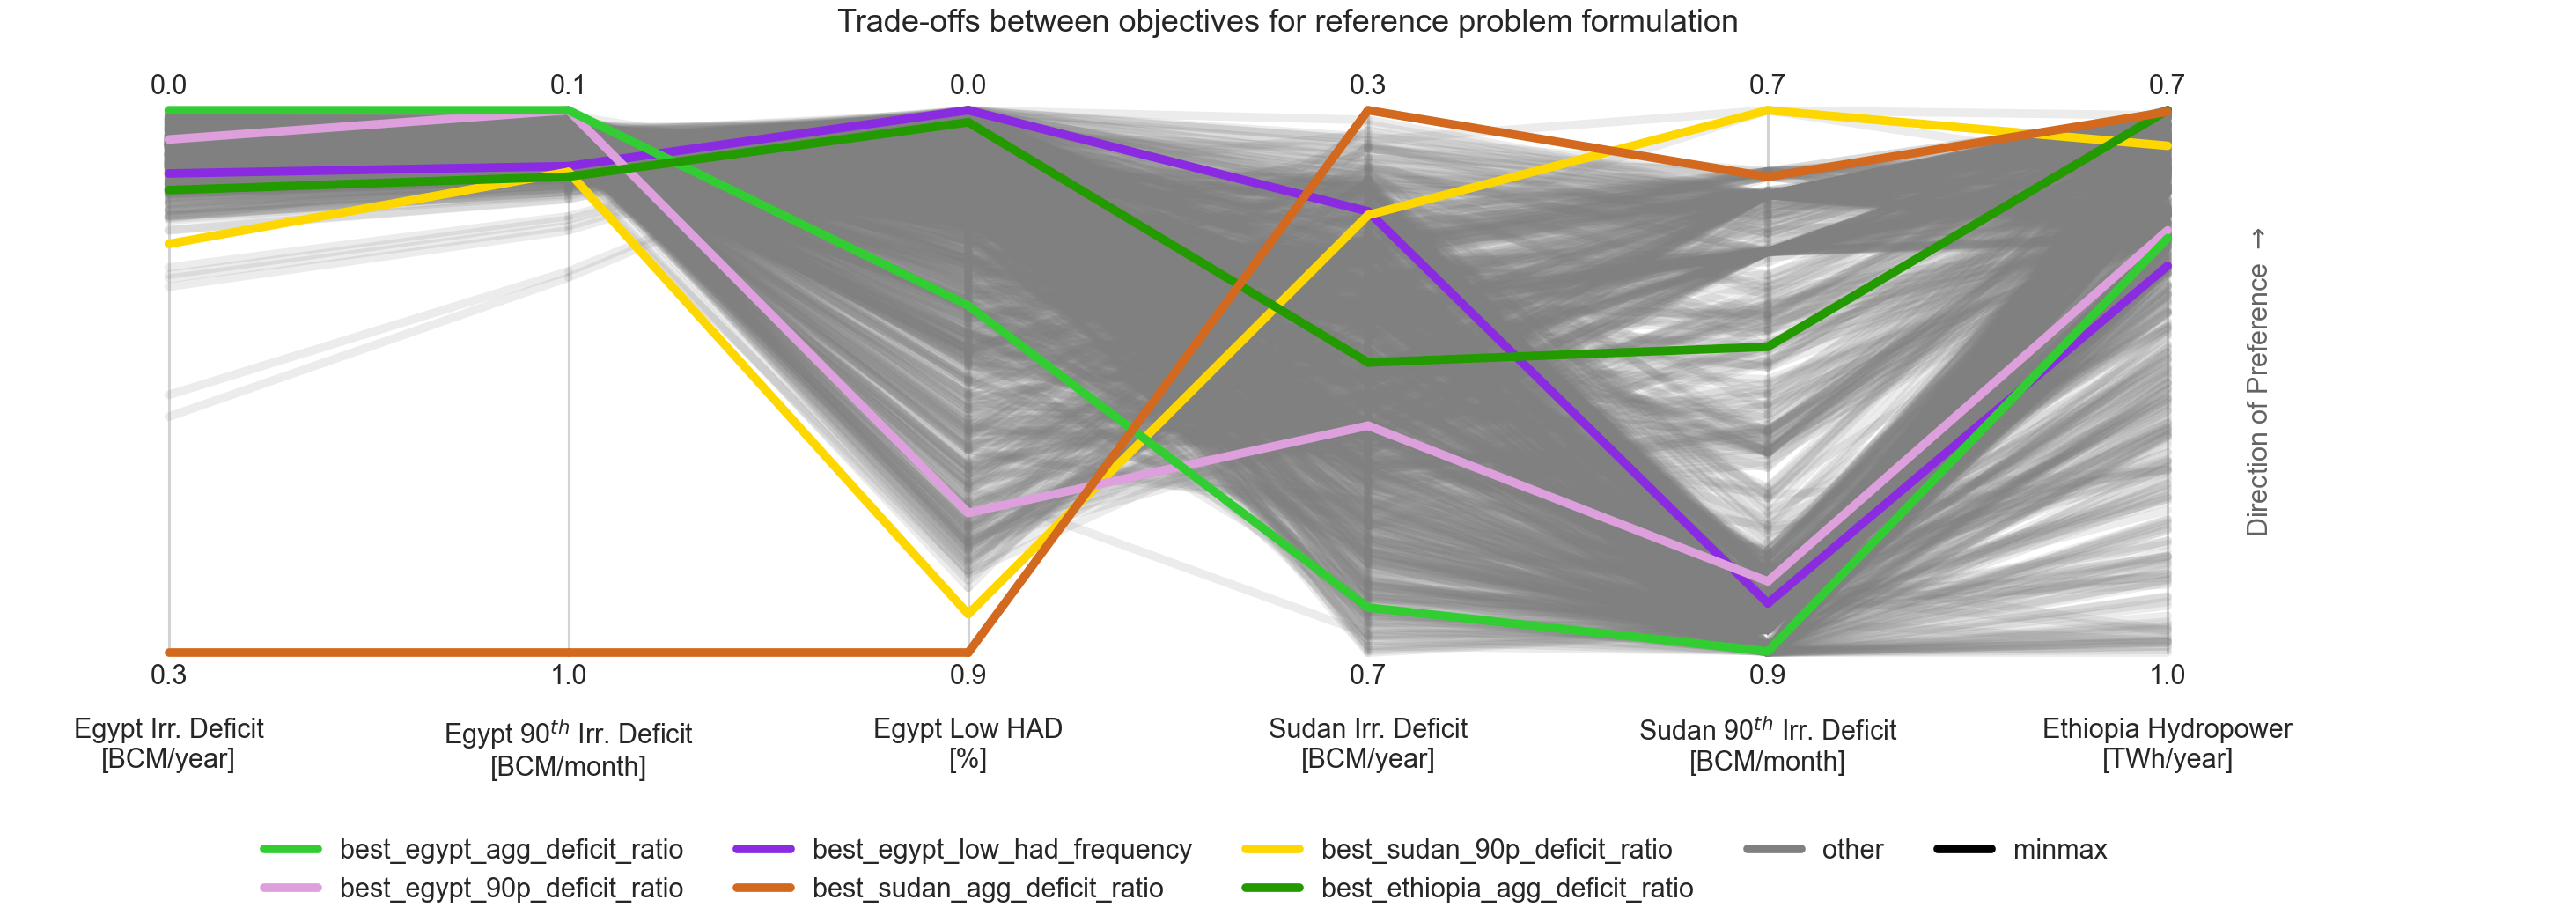

In [ ]:
fig, ax = plt.subplots(figsize=(37.5, 12))

custom_parallel_coordinates(
    ax,
    df_swfs_None,
    columns_axes=objectives_narrow, 
    axis_labels=[
            "Egypt Irr. Deficit",
            "Egypt 90$^{th}$ Irr. Deficit",
            "Egypt Low HAD",
            "Sudan Irr. Deficit",
            "Sudan 90$^{th}$ Irr. Deficit",
            "Ethiopia Hydropower",
    ],
    units=["BCM/year", "BCM/month", "%", "BCM/year", "BCM/month", "TWh/year"],
    ideal_direction='top',
    directions=directions_narrow,
    color_by_categorical='Category_narrow',
    color_categories=created_vars_names_None_narrow,
    brushing_dict = {'Category_narrow': (['other'], '!=')},
    title='Trade-offs between objectives for reference problem formulation',)
plt.show()

In [ ]:
objectives_broad = ['egypt_agg_deficit_ratio', 'egypt_90p_deficit_ratio', 'egypt_low_had_frequency', 'sudan_agg_deficit_ratio', 'sudan_90p_deficit_ratio', 'ethiopia_agg_deficit_ratio', 'utilitarian_welfare', 'total_pwf', 'gini_index']
# Create a copy of directions_narrow
directions_broad = directions_narrow.copy()

# Update directions_broad with additional key-value pairs
directions_broad.update({'utilitarian_welfare': 'max', 'total_pwf': 'max', 'gini_index': 'min'})


In [ ]:
print(directions_broad)

{'egypt_agg_deficit_ratio': 'min', 'egypt_90p_deficit_ratio': 'min', 'egypt_low_had_frequency': 'min', 'sudan_agg_deficit_ratio': 'min', 'sudan_90p_deficit_ratio': 'min', 'ethiopia_agg_deficit_ratio': 'min', 'utilitarian_welfare': 'max', 'total_pwf': 'max', 'gini_index': 'min'}


In [ ]:
best_solutions_swfs_None_broad = get_best_solutions(df_swfs_None[objectives_broad], directions_broad)
created_vars_names_swfs_None_broad, created_vars_swfs_None_broad = create_global_variables(best_solutions_swfs_None_broad, df_swfs_None)
print(best_solutions_swfs_None_broad)

{'egypt_agg_deficit_ratio': 413, 'egypt_90p_deficit_ratio': 151, 'egypt_low_had_frequency': 2, 'sudan_agg_deficit_ratio': 566, 'sudan_90p_deficit_ratio': 6, 'ethiopia_agg_deficit_ratio': 482, 'utilitarian_welfare': 601, 'total_pwf': 602, 'gini_index': 566}


In [ ]:
### Now color by a categorical variable that isnt one of the axes
df_swfs_None["Category_broad"] = 'other'
for i, solution_index in enumerate(created_vars_swfs_None_broad):
    df_swfs_None.loc[solution_index, "Category_broad"] = created_vars_names_swfs_None_broad[i]
df_swfs_None

egypt_agg_deficit_ratio  egypt_90p_deficit_ratio  \
Index                                                     
0                     0.063613                 0.188565   
1                     0.056751                 0.182391   
2                     0.072306                 0.218951   
3                     0.064737                 0.188565   
4                     0.069314                 0.213487   
...                        ...                      ...   
879                   0.056871                 0.165924   
880                   0.048425                 0.146443   
881                   0.057983                 0.180804   
882                   0.058320                 0.181834   
883                   0.062760                 0.194361   

       egypt_low_had_frequency  sudan_agg_deficit_ratio  \
Index                                                     
0                     0.550000                 0.486225   
1                     0.450000                 0.437165   
2                     0.000000                 0.379632   
3                     0.391667                 0.494366   
4                     0.320833                 0.401461   
...                        ...                      ...   
879                   0.550000                 0.546680   
880                   0.183333                 0.593049   
881                   0.129167                 0.538041   
882                   0.012500                 0.532632   
883                   0.158333                 0.558204   

       sudan_90p_deficit_ratio  ethiopia_agg_deficit_ratio  \
Index                                                        
0                     0.903032                    0.712396   
1                     0.732470                    0.763220   
2                     0.887193                    0.783041   
3                     0.905561                    0.712678   
4                     0.723584                    0.731933   
...                        ...                         ...   
879                   0.867324                    0.735183   
880                   0.905675                    0.786428   
881                   0.756291                    0.758836   
882                   0.905318                    0.860229   
883                   0.857665                    0.734459   

       utilitarian_welfare  total_pwf  gini_index  \
Index                                               
0                 3.096169 -64.913813    0.041082   
1                 3.378004 -20.445354    0.040355   
2                 3.658878 -53.113124    0.063350   
3                 3.242426 -66.756046    0.044352   
4                 3.539387 -17.367179    0.043032   
...                    ...        ...         ...   
879               3.078018 -41.717171    0.042848   
880               3.336647 -72.166173    0.059666   
881               3.578879 -21.326053    0.058004   
882               3.449167 -85.481112    0.066825   
883               3.434218 -36.378164    0.056346   

                    Category_narrow                Category_broad  
Index                                                              
0                             other                         other  
1                             other                         other  
2      best_egypt_low_had_frequency  best_egypt_low_had_frequency  
3                             other                         other  
4                             other                         other  
...                             ...                           ...  
879                           other                         other  
880                           other                         other  
881                           other                         other  
882                           other                         other  
883                           other                         other  

[884 rows x 11 columns]

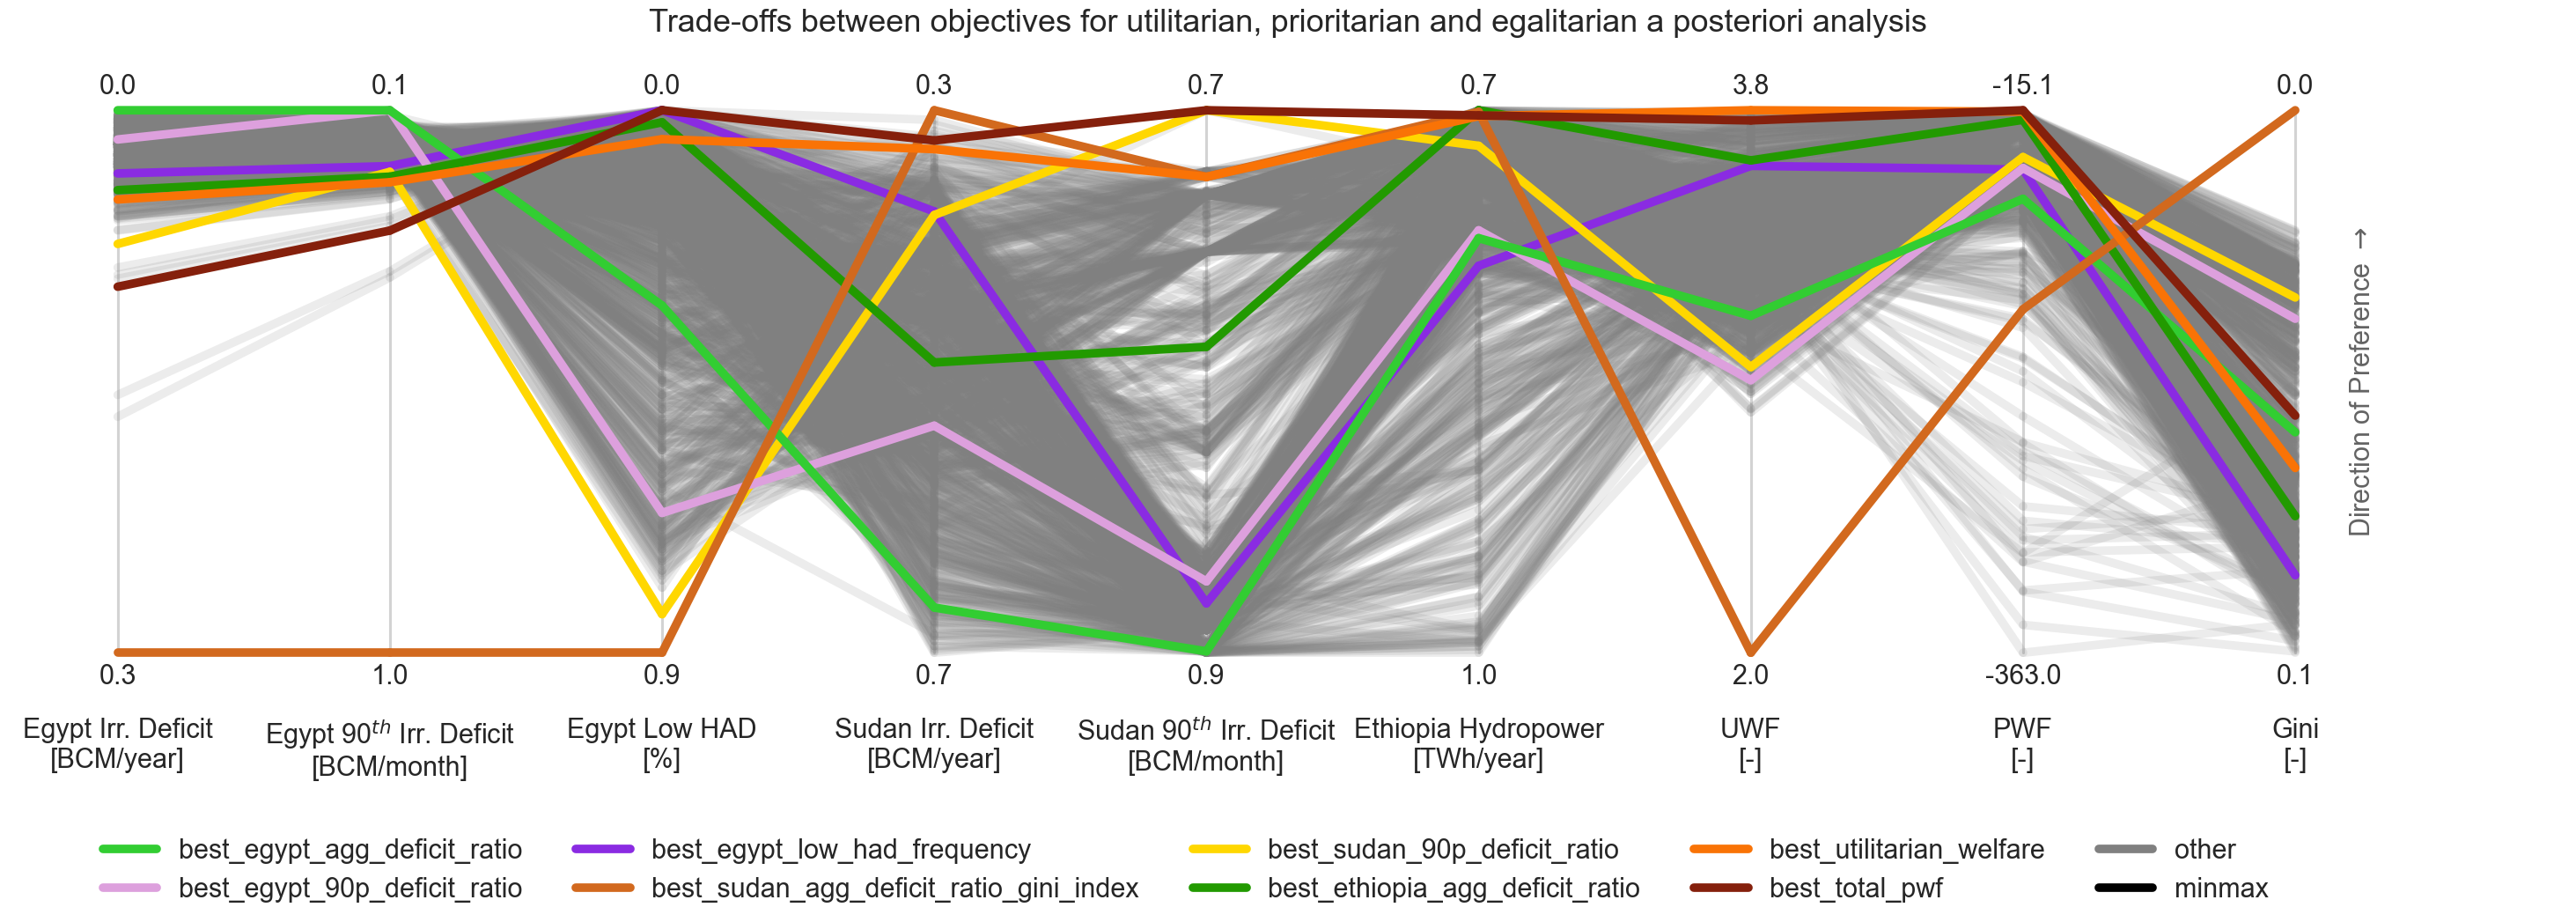

In [ ]:
fig, ax = plt.subplots(figsize=(37.5, 12))

custom_parallel_coordinates(
    ax,
    df_swfs_None,
    columns_axes=objectives_broad, 
    axis_labels=[
            "Egypt Irr. Deficit",
            "Egypt 90$^{th}$ Irr. Deficit",
            "Egypt Low HAD",
            "Sudan Irr. Deficit",
            "Sudan 90$^{th}$ Irr. Deficit",
            "Ethiopia Hydropower",
            "UWF",
            "PWF",
            "Gini",
    ],
    units=["BCM/year", "BCM/month", "%", "BCM/year", "BCM/month", "TWh/year", "-", "-", "-"],
    ideal_direction='top',
    directions=directions_broad,
    color_by_categorical='Category_broad',
    color_categories=created_vars_names_swfs_None_broad,
    brushing_dict = {'Category_broad': (['other'], '!=')},
    title = 'Trade-offs between objectives for utilitarian, prioritarian and egalitarian a posteriori analysis' 
    )

plt.show()

In [ ]:

df_swfs_None['pwf_rank'] = df_swfs_None['total_pwf'].rank(method='dense', ascending=False).astype(int)
df_swfs_None

egypt_agg_deficit_ratio  egypt_90p_deficit_ratio  \
Index                                                     
0                     0.063613                 0.188565   
1                     0.056751                 0.182391   
2                     0.072306                 0.218951   
3                     0.064737                 0.188565   
4                     0.069314                 0.213487   
...                        ...                      ...   
879                   0.056871                 0.165924   
880                   0.048425                 0.146443   
881                   0.057983                 0.180804   
882                   0.058320                 0.181834   
883                   0.062760                 0.194361   

       egypt_low_had_frequency  sudan_agg_deficit_ratio  \
Index                                                     
0                     0.550000                 0.486225   
1                     0.450000                 0.437165   
2                     0.000000                 0.379632   
3                     0.391667                 0.494366   
4                     0.320833                 0.401461   
...                        ...                      ...   
879                   0.550000                 0.546680   
880                   0.183333                 0.593049   
881                   0.129167                 0.538041   
882                   0.012500                 0.532632   
883                   0.158333                 0.558204   

       sudan_90p_deficit_ratio  ethiopia_agg_deficit_ratio  \
Index                                                        
0                     0.903032                    0.712396   
1                     0.732470                    0.763220   
2                     0.887193                    0.783041   
3                     0.905561                    0.712678   
4                     0.723584                    0.731933   
...                        ...                         ...   
879                   0.867324                    0.735183   
880                   0.905675                    0.786428   
881                   0.756291                    0.758836   
882                   0.905318                    0.860229   
883                   0.857665                    0.734459   

       utilitarian_welfare  total_pwf  gini_index  \
Index                                               
0                 3.096169 -64.913813    0.041082   
1                 3.378004 -20.445354    0.040355   
2                 3.658878 -53.113124    0.063350   
3                 3.242426 -66.756046    0.044352   
4                 3.539387 -17.367179    0.043032   
...                    ...        ...         ...   
879               3.078018 -41.717171    0.042848   
880               3.336647 -72.166173    0.059666   
881               3.578879 -21.326053    0.058004   
882               3.449167 -85.481112    0.066825   
883               3.434218 -36.378164    0.056346   

                    Category_narrow                Category_broad  pwf_rank  
Index                                                                        
0                             other                         other       682  
1                             other                         other       182  
2      best_egypt_low_had_frequency  best_egypt_low_had_frequency       486  
3                             other                         other       701  
4                             other                         other        48  
...                             ...                           ...       ...  
879                           other                         other       386  
880                           other                         other       780  
881                           other                         other       212  
882                           other                         other       814  
883                           other   

In [ ]:
objectives_rankedpwf = ['egypt_agg_deficit_ratio', 'egypt_90p_deficit_ratio', 'egypt_low_had_frequency', 'sudan_agg_deficit_ratio', 'sudan_90p_deficit_ratio', 'ethiopia_agg_deficit_ratio', 'utilitarian_welfare', 'pwf_rank', 'gini_index']
directions_rankedpwf = directions_narrow.copy()
directions_rankedpwf.update({'utilitarian_welfare': 'max', 'pwf_rank': 'min', 'gini_index': 'min'})

In [ ]:
best_solutions_swfs_None_rankedpwf = get_best_solutions(df_swfs_None[objectives_rankedpwf], directions_rankedpwf)
created_vars_names_swfs_None_rankedpwf, created_vars_swfs_None_rankedpwf = create_global_variables(best_solutions_swfs_None_rankedpwf, df_swfs_None[objectives_rankedpwf])
print(best_solutions_swfs_None_rankedpwf)

{'egypt_agg_deficit_ratio': 413, 'egypt_90p_deficit_ratio': 151, 'egypt_low_had_frequency': 2, 'sudan_agg_deficit_ratio': 566, 'sudan_90p_deficit_ratio': 6, 'ethiopia_agg_deficit_ratio': 482, 'utilitarian_welfare': 601, 'pwf_rank': 602, 'gini_index': 566}


In [ ]:
### Now color by a categorical variable that isnt one of the axes
df_swfs_None["Category_rankedpwf"] = 'other'
for i, solution_index in enumerate(created_vars_swfs_None_rankedpwf):
    df_swfs_None.loc[solution_index, "Category_rankedpwf"] = created_vars_names_swfs_None_rankedpwf[i]
df_swfs_None

egypt_agg_deficit_ratio  egypt_90p_deficit_ratio  \
Index                                                     
0                     0.063613                 0.188565   
1                     0.056751                 0.182391   
2                     0.072306                 0.218951   
3                     0.064737                 0.188565   
4                     0.069314                 0.213487   
...                        ...                      ...   
879                   0.056871                 0.165924   
880                   0.048425                 0.146443   
881                   0.057983                 0.180804   
882                   0.058320                 0.181834   
883                   0.062760                 0.194361   

       egypt_low_had_frequency  sudan_agg_deficit_ratio  \
Index                                                     
0                     0.550000                 0.486225   
1                     0.450000                 0.437165   
2                     0.000000                 0.379632   
3                     0.391667                 0.494366   
4                     0.320833                 0.401461   
...                        ...                      ...   
879                   0.550000                 0.546680   
880                   0.183333                 0.593049   
881                   0.129167                 0.538041   
882                   0.012500                 0.532632   
883                   0.158333                 0.558204   

       sudan_90p_deficit_ratio  ethiopia_agg_deficit_ratio  \
Index                                                        
0                     0.903032                    0.712396   
1                     0.732470                    0.763220   
2                     0.887193                    0.783041   
3                     0.905561                    0.712678   
4                     0.723584                    0.731933   
...                        ...                         ...   
879                   0.867324                    0.735183   
880                   0.905675                    0.786428   
881                   0.756291                    0.758836   
882                   0.905318                    0.860229   
883                   0.857665                    0.734459   

       utilitarian_welfare  total_pwf  gini_index  \
Index                                               
0                 3.096169 -64.913813    0.041082   
1                 3.378004 -20.445354    0.040355   
2                 3.658878 -53.113124    0.063350   
3                 3.242426 -66.756046    0.044352   
4                 3.539387 -17.367179    0.043032   
...                    ...        ...         ...   
879               3.078018 -41.717171    0.042848   
880               3.336647 -72.166173    0.059666   
881               3.578879 -21.326053    0.058004   
882               3.449167 -85.481112    0.066825   
883               3.434218 -36.378164    0.056346   

                    Category_narrow                Category_broad  pwf_rank  \
Index                                                                         
0                             other                         other       682   
1                             other                         other       182   
2      best_egypt_low_had_frequency  best_egypt_low_had_frequency       486   
3                             other                         other       701   
4                             other                         other        48   
...                             ...                           ...       ...   
879                           other                         other       386   
880                           other                         other       780   
881                           other                         other       212   
882                           other                         other       814   
883                       

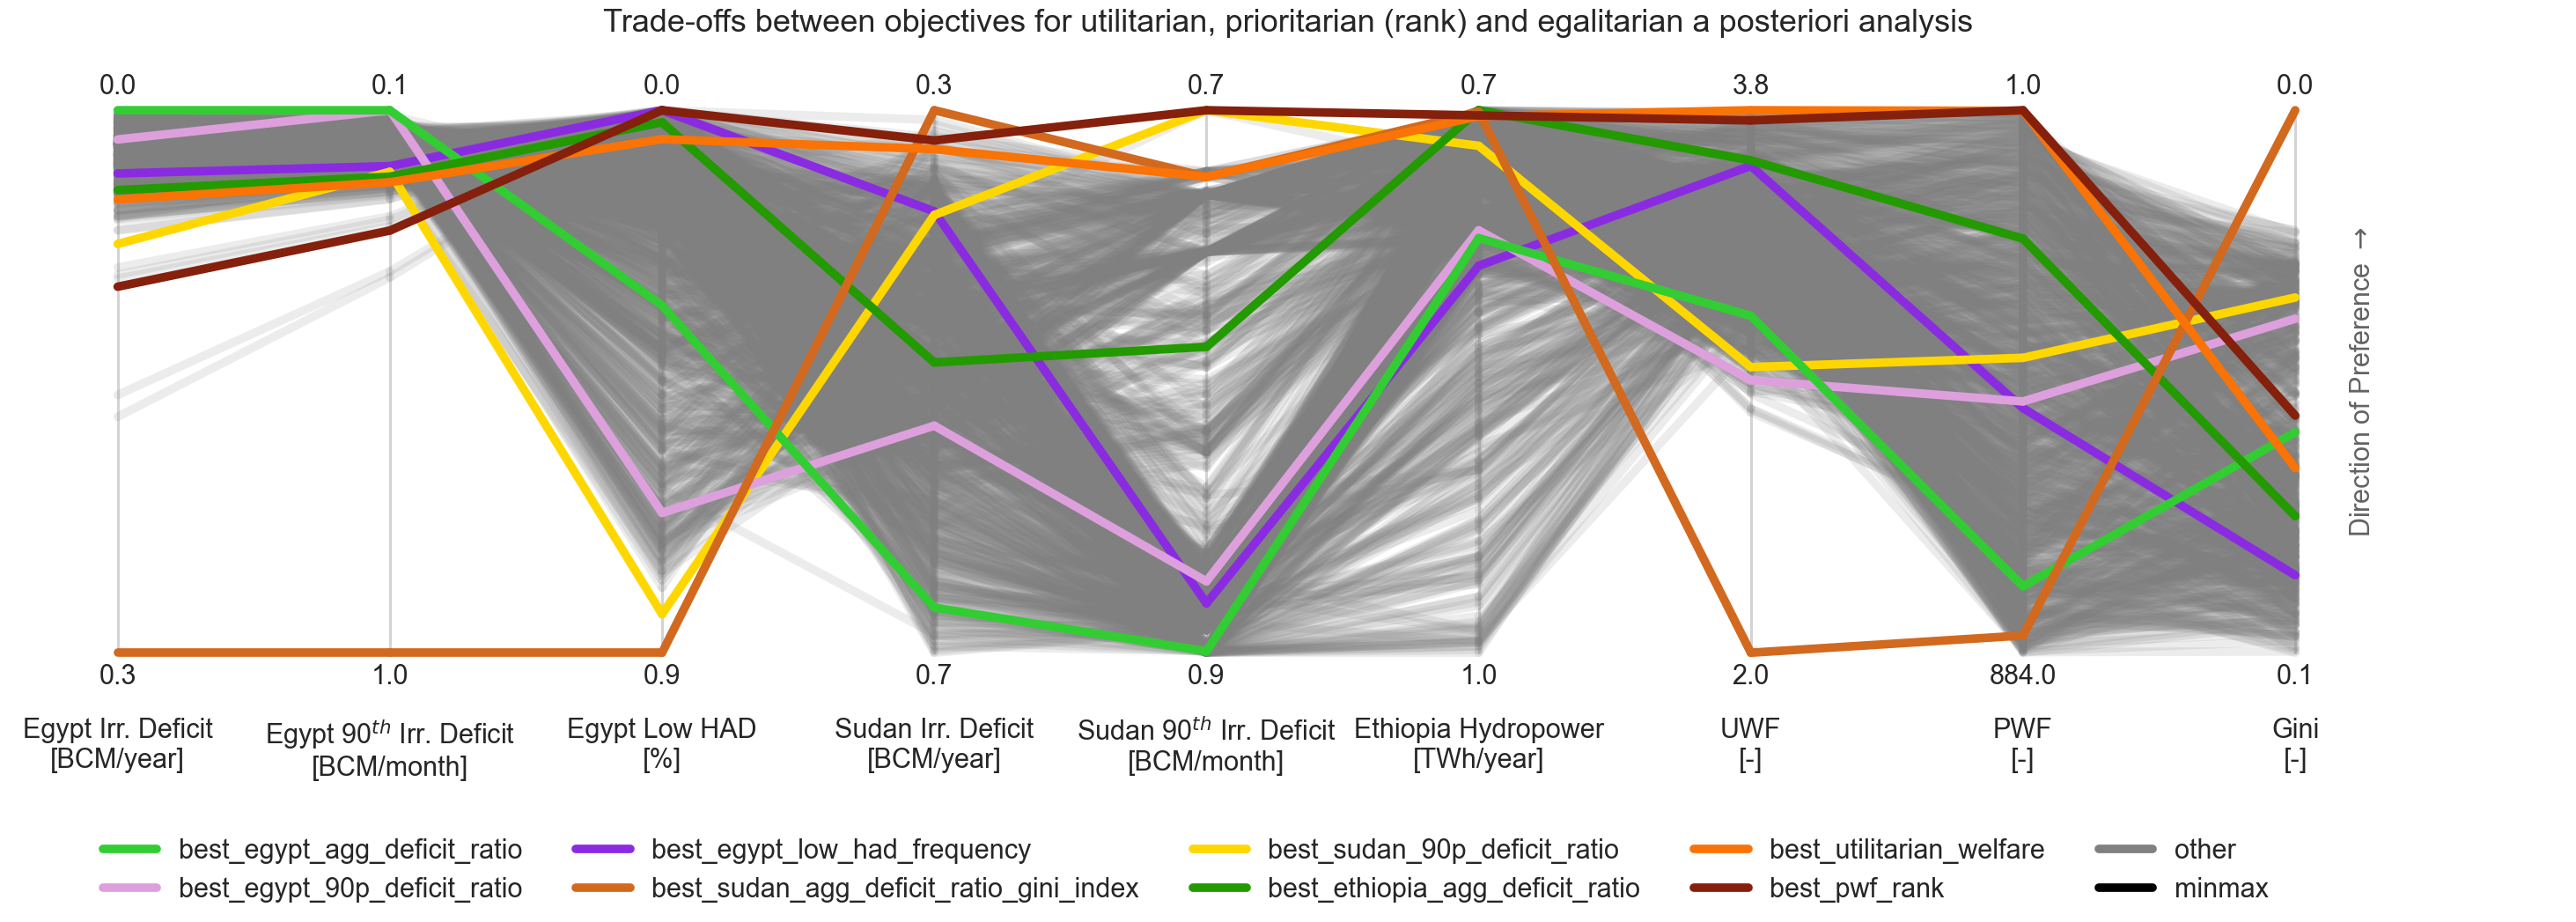

In [ ]:
fig, ax = plt.subplots(figsize=(37.5, 12))

custom_parallel_coordinates(
    ax,
    df_swfs_None,
    columns_axes=objectives_rankedpwf, 
    axis_labels=[
            "Egypt Irr. Deficit",
            "Egypt 90$^{th}$ Irr. Deficit",
            "Egypt Low HAD",
            "Sudan Irr. Deficit",
            "Sudan 90$^{th}$ Irr. Deficit",
            "Ethiopia Hydropower",
            "UWF",
            "PWF",
            "Gini",
    ],
    units=["BCM/year", "BCM/month", "%", "BCM/year", "BCM/month", "TWh/year", "-", "-", "-"],
    ideal_direction='top',
    directions=directions_rankedpwf,
    color_by_categorical='Category_rankedpwf',
    color_categories=created_vars_names_swfs_None_rankedpwf,
    brushing_dict = {'Category_rankedpwf': (['other'], '!=')},
    title='Trade-offs between objectives for utilitarian, prioritarian (rank) and egalitarian a posteriori analysis'
    )

plt.show()

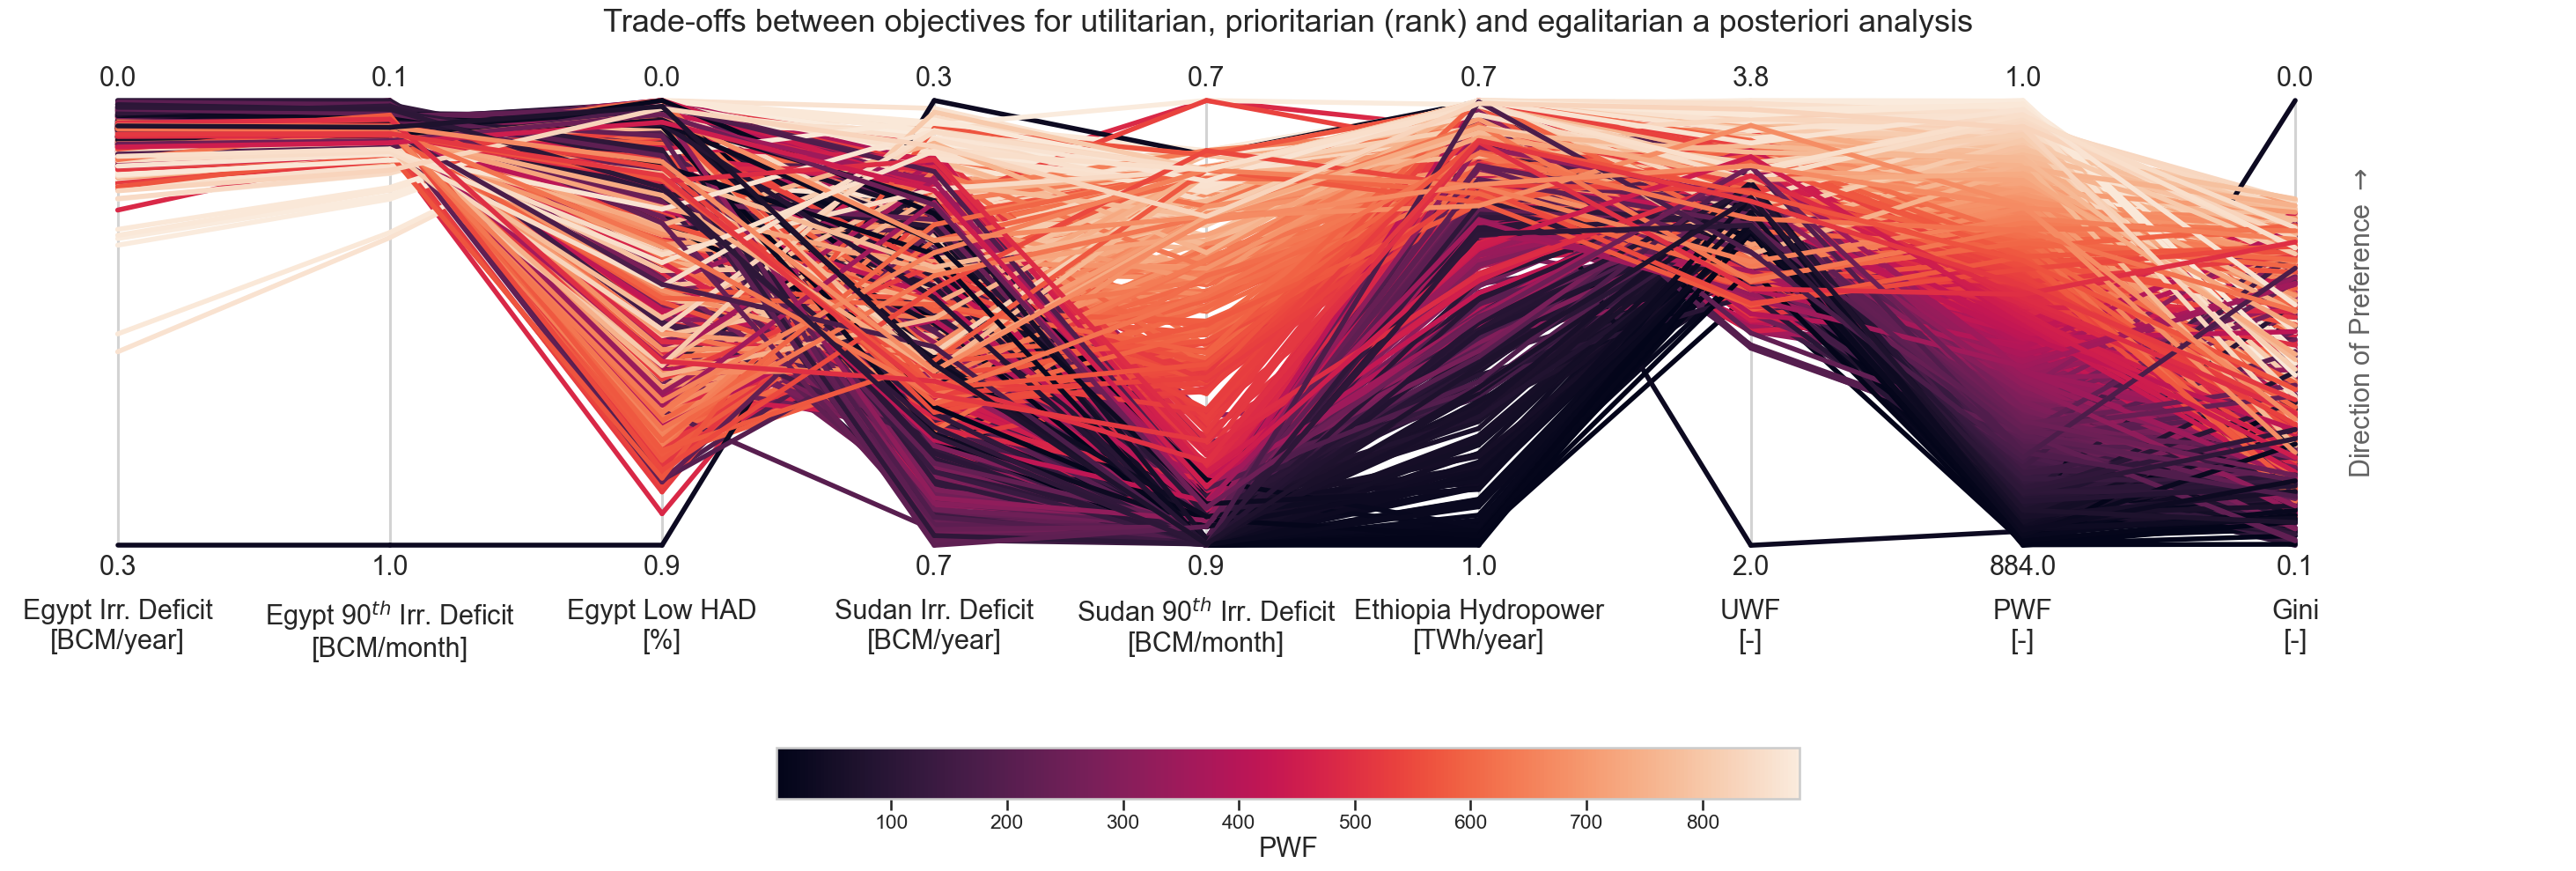

In [ ]:
fig, ax = plt.subplots(figsize=(37.5, 12))

custom_parallel_coordinates(
    ax,
    df_swfs_None,
    columns_axes=objectives_rankedpwf, 
    axis_labels=[
            "Egypt Irr. Deficit",
            "Egypt 90$^{th}$ Irr. Deficit",
            "Egypt Low HAD",
            "Sudan Irr. Deficit",
            "Sudan 90$^{th}$ Irr. Deficit",
            "Ethiopia Hydropower",
            "UWF",
            "PWF",
            "Gini",
    ],
    units=["BCM/year", "BCM/month", "%", "BCM/year", "BCM/month", "TWh/year", "-", "-", "-"],
    ideal_direction='top',
    directions=directions_rankedpwf,
    color_by_continuous='pwf_rank',
    lw_base=4,
    title='Trade-offs between objectives for utilitarian, prioritarian (rank) and egalitarian a posteriori analysis'
    )

plt.show()

In [ ]:
# # a parallel coordinates plot of the normalized objective values for every solution
# plot_parallel_coordinates(df_obj_norm, 'class_obj', 'Objectives', 'Normalized value', 'Parallel coordinates plot of normalized objective values.')

In [ ]:
# def calculate_coefficient_of_variation(dataframe: pd.DataFrame, columns: list):
#     """
#     Calculate the coefficient of variation for selected columns in the input DataFrame and return a new DataFrame.

#     The coefficient of variation (CV) measures the relative variability of a dataset, defined as the ratio
#     of the standard deviation to the mean. It provides a standardized measure of dispersion.

#     Args:
#         dataframe (pd.DataFrame): The input DataFrame.
#         columns (list): A list of column names for which to calculate the coefficient of variation.

#     Returns:
#         pd.DataFrame: A new DataFrame with the selected columns replaced by their respective coefficient of variation.

#     """
#     df_none = dataframe.copy()

#     # Calculate the standard deviation for selected columns
#     std_deviation = df_none[columns].std()

#     # Calculate the mean for selected columns
#     mean = df_none[columns].mean()

#     # Calculate the coefficient of variation for selected columns
#     df_none[columns] = (df_none[columns] - mean) / std_deviation

#     return df_none


In [ ]:
# # the objectives dataframe with their values replaced by their coefficient of variation
# df_obj_cov = calculate_coefficient_of_variation(df_objectives, obj)
# df_obj_cov

In [ ]:
# plot_parallel_coordinates(df_obj_cov, 'class_obj', 'Objectives', 'Coefficient of variation', 'Parallel coordinates plot of coefficient of variation values.')

## 3.3 A Priori Results

In [ ]:
objectives_broad = ['egypt_agg_deficit_ratio', 'egypt_90p_deficit_ratio', 'egypt_low_had_frequency', 'sudan_agg_deficit_ratio', 'sudan_90p_deficit_ratio', 'ethiopia_agg_deficit_ratio', 'utilitarian_welfare', 'total_pwf', 'gini_index']

# Create a copy of directions_narrow
directions_broad = directions_narrow.copy()

# Update directions_broad with additional key-value pairs
directions_broad.update({'utilitarian_welfare': 'max', 'total_pwf': 'max', 'gini_index': 'min'})

In [ ]:
df_swfs_exps

egypt_agg_deficit_ratio  egypt_90p_deficit_ratio  \
Principle Index                                                     
None      0                     0.063613                 0.188565   
          1                     0.056751                 0.182391   
          2                     0.072306                 0.218951   
          3                     0.064737                 0.188565   
          4                     0.069314                 0.213487   
...                                  ...                      ...   
gini      333                   0.058888                 0.185044   
          334                   0.269800                 1.000000   
          335                   0.048625                 0.152609   
          336                   0.099155                 0.162350   
          337                   0.056078                 0.176157   

                 egypt_low_had_frequency  sudan_agg_deficit_ratio  \
Principle Index                                                     
None      0                     0.550000                 0.486225   
          1                     0.450000                 0.437165   
          2                     0.000000                 0.379632   
          3                     0.391667                 0.494366   
          4                     0.320833                 0.401461   
...                                  ...                      ...   
gini      333                   0.262500                 0.383202   
          334                   0.900000                 0.434169   
          335                   0.195833                 0.686921   
          336                   0.700000                 0.645428   
          337                   0.095833                 0.493905   

                 sudan_90p_deficit_ratio  ethiopia_agg_deficit_ratio  \
Principle Index                                                        
None      0                     0.903032                    0.712396   
          1                     0.732470                    0.763220   
          2                     0.887193                    0.783041   
          3                     0.905561                    0.712678   
          4                     0.723584                    0.731933   
...                                  ...                         ...   
gini      333                   0.875075                    0.849522   
          334                   0.892256                    0.820905   
          335                   0.903032                    0.757236   
          336                   0.905318                    0.768033   
          337                   0.886140                    0.813899   

                 principle_result  utilitarian_welfare   total_pwf  gini_index  
Principle Index                                                                 
None      0                   NaN             3.096169  -64.913813    0.041082  
          1                   NaN             3.378004  -20.445354    0.040355  
          2                   NaN             3.658878  -53.113124    0.063350  
          3                   NaN             3.242426  -66.756046    0.044352  
          4                   NaN             3.539387  -17.367179    0.043032  
...                           ...                  ...         ...         ...  
gini      333            0.605042             3.385769  -57.670601    0.054394  
          334            0.802344             1.682869 -111.158951    0.028378  
          335            0.600559             3.255744  -68.783051    0.059218  
          336            0.700105             2.719717  -75.928109    0.042269  
          337            0.562370             3.477988  -56.866261    0.061653  

[1679 rows x 10 columns]

In [ ]:
# Group the DataFrame by 'Principle' level and get the unique principles in the original order
principles_order = df_swfs_exps.index.get_level_values('Principle').unique()

# Create an empty dictionary to store the results
swfs_exps_dict = {}

# Iterate through unique principles in the original order and store corresponding DataFrames in the dictionary
for principle in principles_order:
    principle_data = df_swfs_exps.drop(columns='principle_result').loc[df_swfs_exps.index.get_level_values('Principle') == principle]
    swfs_exps_dict[principle] = principle_data


In [ ]:
# Initialize empty dictionaries
best_solutions_dict = {}
created_vars_names_dict = {}
created_vars_dict = {}

# Iterate through the dictionary
for key, obj_df in swfs_exps_dict.items():
    # Calculate best solutions, created variables, and variable names
    best_solutions = get_best_solutions(obj_df, directions_broad)
    created_vars_names, created_vars = create_global_variables(best_solutions, obj_df)

    # Store the results in dictionaries using the dataframe's key as the key in the dictionary
    best_solutions_dict[key] = best_solutions
    created_vars_names_dict[key] = created_vars_names
    created_vars_dict[key] = created_vars

    ### Now color by a categorical variable that isnt one of the axes
    obj_df["Category_broad"] = 'other'
    for i, solution_index in enumerate(created_vars):
        obj_df.loc[solution_index, "Category_broad"] = created_vars_names[i]

In [ ]:
directions_broad

{'egypt_agg_deficit_ratio': 'min',
 'egypt_90p_deficit_ratio': 'min',
 'egypt_low_had_frequency': 'min',
 'sudan_agg_deficit_ratio': 'min',
 'sudan_90p_deficit_ratio': 'min',
 'ethiopia_agg_deficit_ratio': 'min',
 'utilitarian_welfare': 'max',
 'total_pwf': 'max',
 'gini_index': 'min'}

In [ ]:
# Initialize dictionaries to store min and max values
min_dict = {}
max_dict = {}

# Iterate through the dataframes in swfs_exps_dict
for key, df in swfs_exps_dict.items():
    # Calculate min and max values for each column (except 'Category_broad')
    for column in df.columns:
        if column != 'Category_broad':
            min_dict[column] = min(min_dict.get(column, float('inf')), df[column].min())
            max_dict[column] = max(max_dict.get(column, float('-inf')), df[column].max())

# Add 'Category_broad' to the dictionaries
min_dict['Category_broad'] = 'minmax'
max_dict['Category_broad'] = 'minmax'

# Create a single dataframe for min and max rows with 'Category_broad' as the final column
min_max_df = pd.DataFrame([min_dict, max_dict])
min_max_df


egypt_agg_deficit_ratio  egypt_90p_deficit_ratio  egypt_low_had_frequency  \
0                 0.043776                 0.105818                   0.0000   
1                 0.309014                 1.000000                   0.9375   

   sudan_agg_deficit_ratio  sudan_90p_deficit_ratio  \
0                 0.299523                 0.700405   
1                 0.695592                 0.905889   

   ethiopia_agg_deficit_ratio  utilitarian_welfare   total_pwf  gini_index  \
0                    0.712159             1.605931 -415.457461    0.022264   
1                    0.962438             3.875126  -14.927602    0.069303   

  Category_broad  
0         minmax  
1         minmax

In [ ]:
for key, value in swfs_exps_dict.items():
    print("Dictionary Key:", key)

Dictionary Key: None
Dictionary Key: uwf
Dictionary Key: pwf
Dictionary Key: gini


minmax_df is not None


minmax to zero
minmax to zero
minmax_df is not None
minmax to zero
minmax to zero
minmax_df is not None
minmax to zero
minmax to zero
minmax_df is not None
minmax to zero
minmax to zero


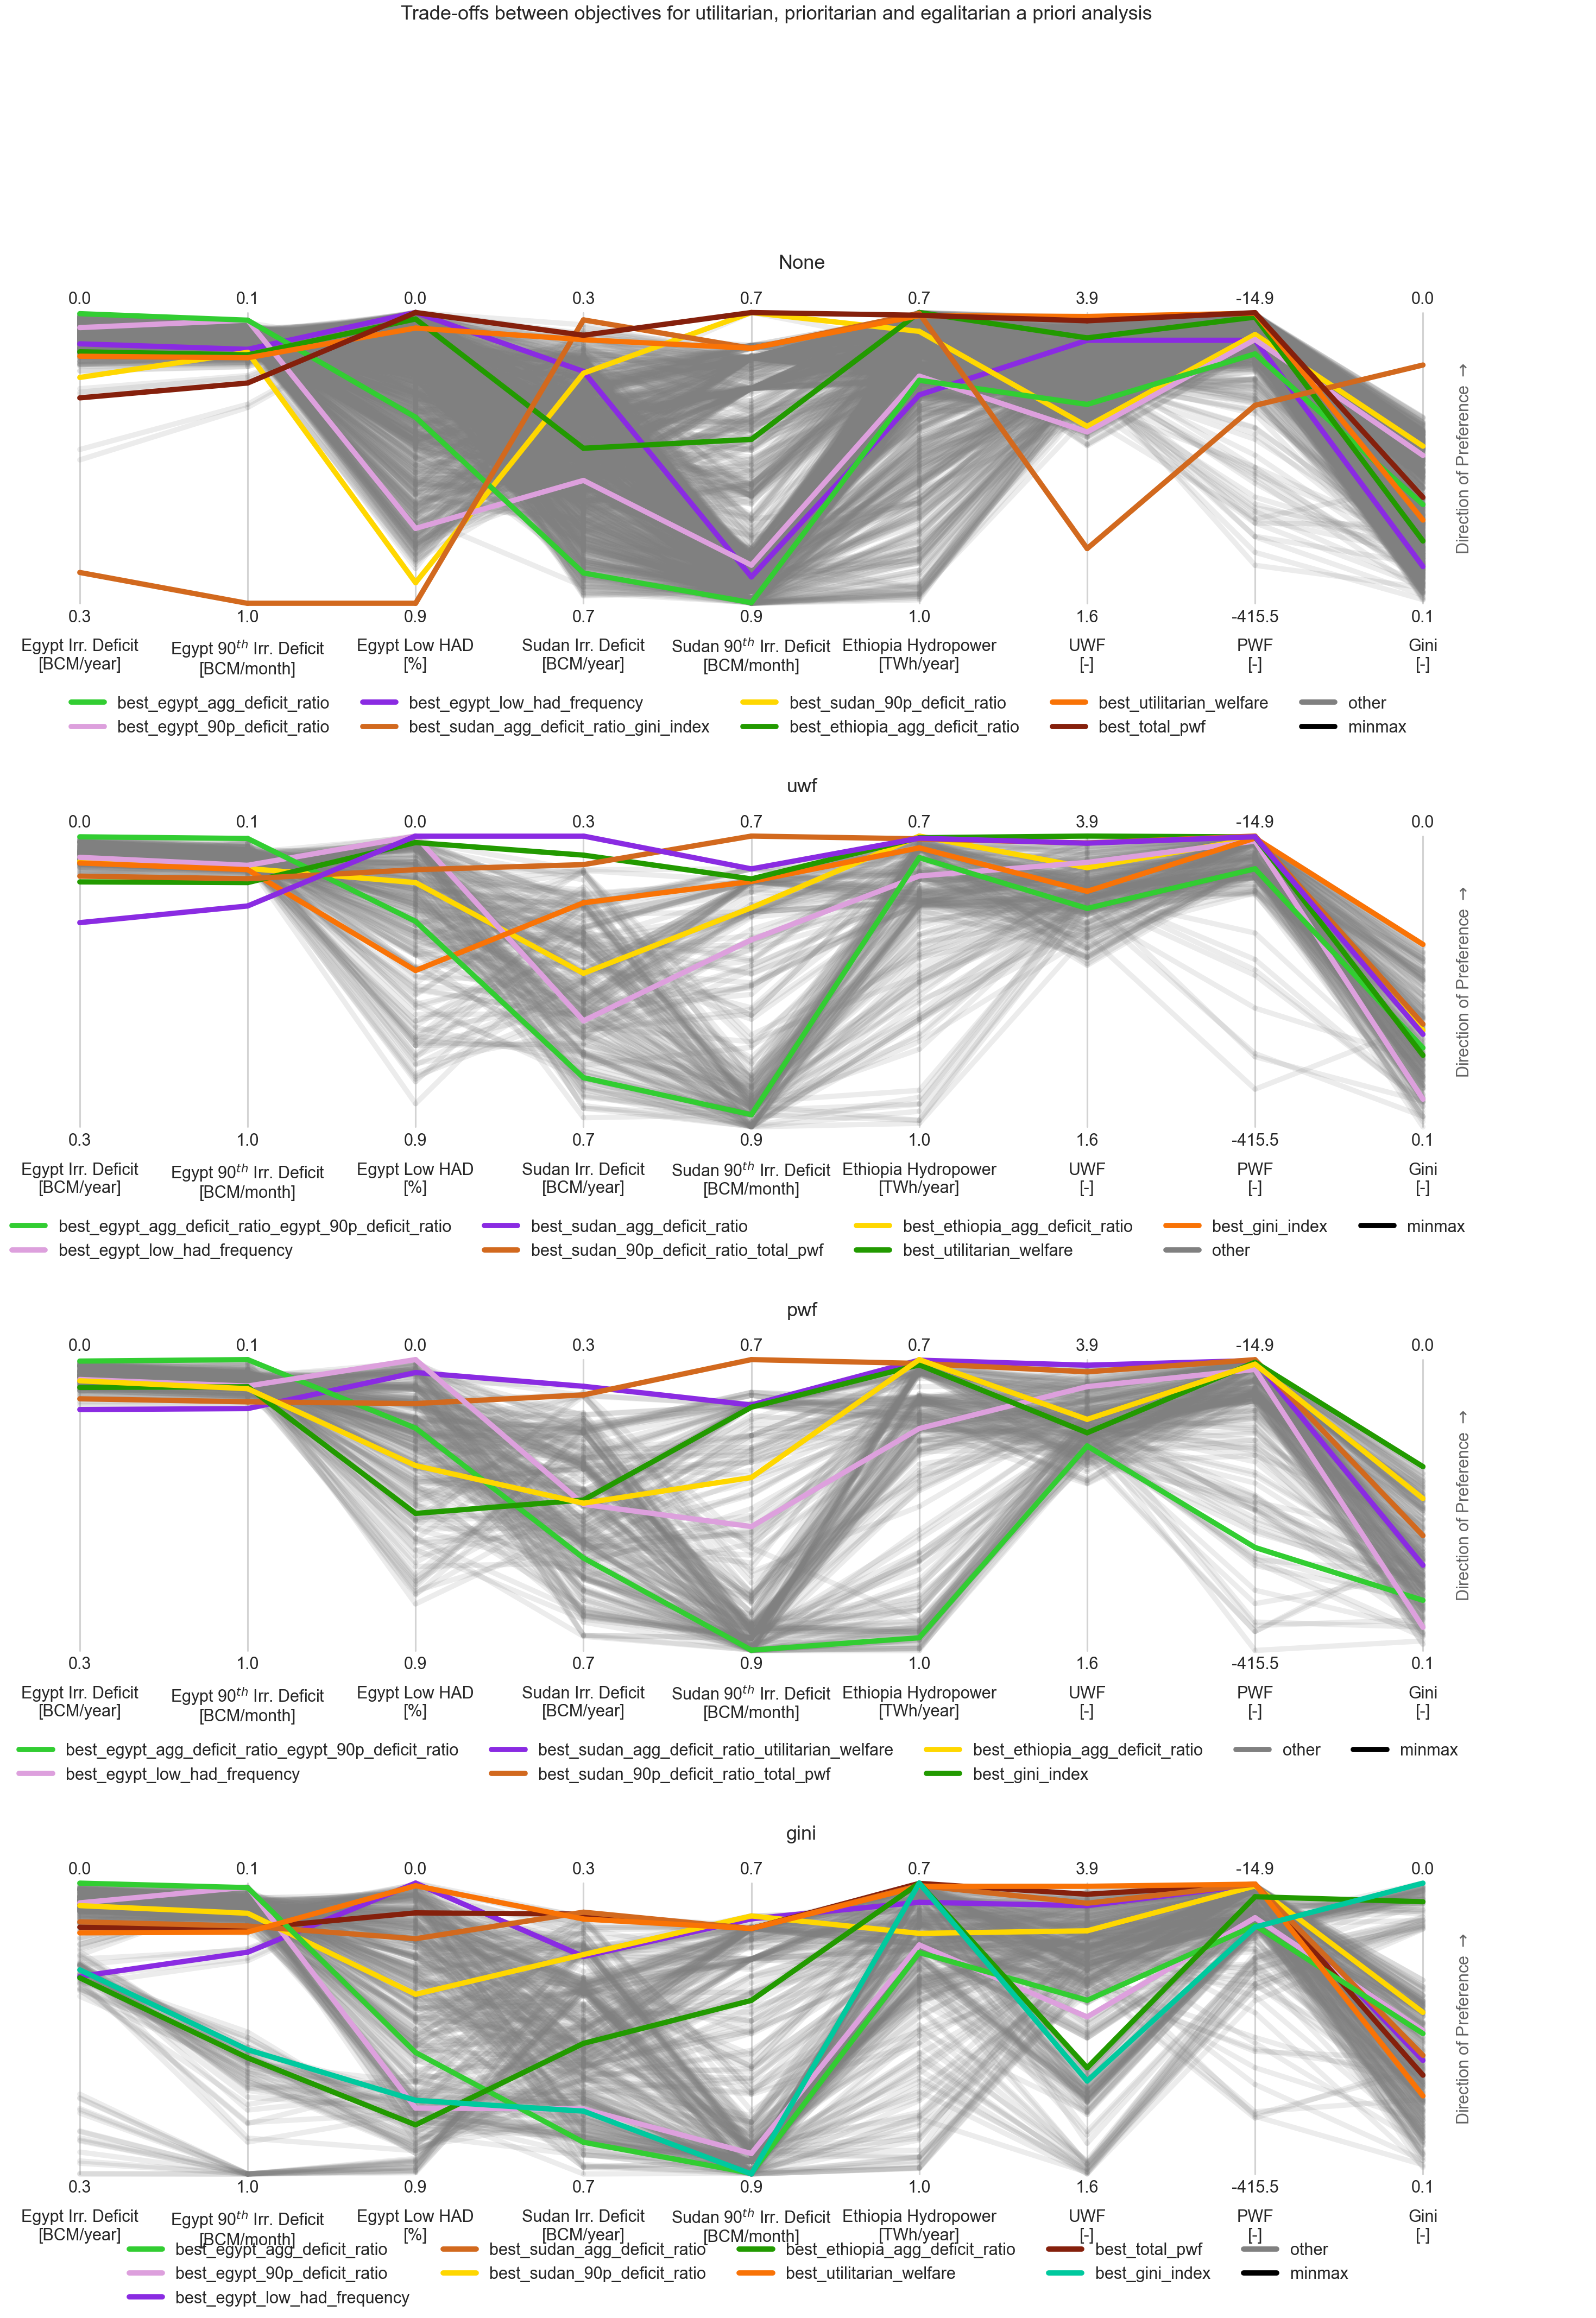

In [ ]:
# Create subplots in a grid where each subplot shares the same y-axis
n_plots = len(swfs_exps_dict)
fig, axes = plt.subplots(n_plots, 1, figsize=(37.5, 12*n_plots), sharex=True, sharey=True)
# Iterate through the dictionary
for idx, (key, df) in enumerate(swfs_exps_dict.items()):
    df_plot = df.droplevel(level='Principle')
    ax=axes[idx]
    
    custom_parallel_coordinates(
        ax,
        df_plot,
        min_max_df,
        columns_axes=objectives_broad,
        axis_labels=[
            "Egypt Irr. Deficit",
            "Egypt 90$^{th}$ Irr. Deficit",
            "Egypt Low HAD",
            "Sudan Irr. Deficit",
            "Sudan 90$^{th}$ Irr. Deficit",
            "Ethiopia Hydropower",
            "UWF",
            "PWF",
            "Gini",
        ],
        units=["BCM/year", "BCM/month", "%", "BCM/year", "BCM/month", "TWh/year", "-", "-", "-"],
        ideal_direction='top',
        directions=directions_broad,
        color_by_categorical='Category_broad',
        color_categories=created_vars_names_dict[key],
        brushing_dict={'Category_broad': (['other', 'minmax'], '!=')},
        title=key,
    )
 
# Show the entire plot after all subplots have been created
fig.suptitle('Trade-offs between objectives for utilitarian, prioritarian and egalitarian a priori analysis', va='bottom', fontsize=26)

plt.show()


#### 2.2.5.2 Compare Utilirarianism with Prioritarian transformation

In [ ]:
# Extract the 'utilitarian_welfare' and 'total_pwf' columns from your DataFrame
utilitarian_welfare = df_uwf['utilitarian_welfare']
prioritarian_total_pwf = df_pwf['total_pwf']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(utilitarian_welfare, prioritarian_total_pwf, alpha=0.5)
plt.title("Scatter Plot: Utilitarian Welfare vs. Prioritarian Total")
plt.xlabel("Utilitarian Welfare")
plt.ylabel("Prioritarian Total PWF")
plt.grid(True)

# Show the plot
plt.show()

NameError: name 'df_uwf' is not defined

In [ ]:
# # Create an empty list to store DataFrames
# dfs = []

# # Iterate through the original DataFrame and extract data
# for index, row in df_pwf.iterrows():
#     gamma_values = row["gamma_values"]
#     pwf_values = row["pwf_values"]
#     objectives = df_none.columns
    
#     # Create a DataFrame for each combination of gamma, transformed value, and objective
#     for gamma, transformed_value, objective in zip(gamma_values, pwf_values, objectives):
#         data = {"Objective_Value": [row[objective]], "Transformed_Value": [transformed_value], "Gamma_Value": [gamma]}
#         dfs.append(pd.DataFrame(data))

# # Concatenate all the DataFrames into one
# df_pwf_transformation = pd.concat(dfs, ignore_index=True)

# # Now new_df contains the transformed values with corresponding objectives and gamma values
# df_pwf_transformation

In [ ]:
# # Define the tolerance for being near the values
# tolerance = 0.05  # You can adjust this tolerance as needed

# # Define the values you want to select
# values_to_select = [0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# # Initialize an empty boolean mask
# combined_mask = np.zeros(len(df_pwf_transformation), dtype=bool)

# # Iterate through the values and create masks
# for value in values_to_select:
#     mask = np.isclose(df_pwf_transformation['Gamma_Value'], value, atol=tolerance)
#     combined_mask |= mask  # Combine masks using logical OR

# # Use the combined mask to select the rows
# df_pwf_TMasked = df_pwf_transformation[combined_mask]

# # Round the 'Gamma_Value' column to the desired number of decimal places
# df_pwf_TMasked = df_pwf_TMasked.copy()
# df_pwf_TMasked['Rounded_Gamma_Value'] = df_pwf_TMasked['Gamma_Value'].round(1)

# # Print the selected DataFrame
# df_pwf_TMasked

# !! Waarom minder observaties bij hogere gamma's?

In [ ]:
# # Set Seaborn style and context
# sns.set(style='whitegrid')
# sns.set_context("talk")

# # Group the data by gamma value
# grouped = df_pwf_TMasked.groupby('Rounded_Gamma_Value')

# # Define a color palette for different gamma values (colorblind-friendly)
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# # Create a figure and axis for plotting
# fig, ax = plt.subplots(figsize=(10, 6))

# # Iterate through each group (gamma value) and create a scatter plot
# for i, (name, group) in enumerate(grouped):
#     # Use a different color and marker style for each gamma value
#     sns.scatterplot(
#         x=group['Objective_Value'],
#         y=group['Transformed_Value'],
#         label=f'Gamma = {name:.1f}',
#         color=colors[i % len(colors)],  # Loop through colors if more groups
#         marker='o',
#         ax=ax
#     )

# # Set labels and title
# ax.set_xlabel('Objective Values')
# ax.set_ylabel('Transformed Values')
# ax.set_title('Transformation Curves')

# # Move the legend outside the plot
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# # Show the plot
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()
# plt.show()

In [ ]:
# Score prioritarian als kleur [DONE]

# Take 1 best and worst scoring pwf -> seperate objective utilities instead of aggregation into transformation 

# animation of bigger gamma's (plaatjes exporteren, morphe)

# Transformation in rank group by gamma 


In [ ]:
# Explain function 

# Explain that it is about the order (teken)

# Explain the effect of high gammas

# Aggregation of objectives -> 

# Link in real-world value of scores 